<a href="https://colab.research.google.com/github/jojocsn/Great-Depression/blob/main/Pythonhappiness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import data**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#read 2019 dataset
df2019 = pd.read_csv('https://raw.githubusercontent.com/Py4EconWeek-LSE/Course-material/main/Happiness%20and%20GDP/happiness_with_continent(2019).csv')
df2019.head()

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014",Continent
0,Afghanistan,2008,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia
1,Afghanistan,2009,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906,0.286315,NaN,NaN,NaN,NaN,NaN,NaN,Asia
2,Afghanistan,2010,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318,0.275833,NaN,NaN,NaN,NaN,NaN,NaN,Asia
3,Afghanistan,2011,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia
4,Afghanistan,2012,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia


In [4]:
#read 2020 dataset
df2020 = pd.read_csv('https://www.dropbox.com/s/4s5kg4qse26y8s8/2020.csv?dl=1')
df2020.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


In [5]:
#list 2019colums
df2019.columns

Index(['Country name', 'Year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-16',
       'gini of household income reported in Gallup, by wp5-year',
       'Most people can be trusted, Gallup',
       'Most people can be trusted, WVS round 1981-1984',
       'Most people can be trusted, WVS round 1989-1993',
       'Most people can be trusted, WVS round 1994-1998',
       'Most people can be trusted, WVS round 1999-2004',
       'Most people can be trusted, WVS round 2005-2009',
       'Most people can be trusted, WV

In [6]:
#list 2020colums
df2020.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

## **Data cleaning**
*mergedf = merge 2005-2020 data w continent and regional indicator*

In [7]:
#list common columns in 2020
#create a new dataframe with the common columns in 2020

comcol_2020 = ['Country name','Regional indicator', 'Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 
                'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
com_df2020 = df2020.loc[:, comcol_2020]

#add 'Year' column for 2020 data
com_df2020.insert(1, 'Year', 2020, True)
#add 'Continent' column for 2020 data
com_df2020.insert(1, 'Continent', 'NA', True)

com_df2020.head()

,Country name,Continent,Year,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,NA,2020,Western Europe,7.8087,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445
1,Denmark,NA,2020,Western Europe,7.6456,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489
2,Switzerland,NA,2020,Western Europe,7.5599,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728
3,Iceland,NA,2020,Western Europe,7.5045,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710
4,Norway,NA,2020,Western Europe,7.4880,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218


In [8]:
#list common columns in 2019
#create a new dataframe with the common columns in 2019

comcol_2019 = ['Country name', 'Year', 'Continent','Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 
                'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
com_df2019 = df2019.loc[:, comcol_2019]

#renaming 2019 common columns in the new dataframe, matching names with 2020 common columns
com_df2019.rename(columns = {'Life Ladder':'Ladder score', 'Log GDP per capita':'Logged GDP per capita', 
                                  'Healthy life expectancy at birth': 'Healthy life expectancy'}, inplace = True)
com_df2019.head()

,Country name,Year,Continent,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,2008,Asia,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686
1,Afghanistan,2009,Asia,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035
2,Afghanistan,2010,Asia,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766
3,Afghanistan,2011,Asia,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109
4,Afghanistan,2012,Asia,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620


In [9]:
#create a 2019 continent dictionary, including country names and continents
#mapping 2020 continent to 2019 continent using 2019 continent dictionary

cont_dict = com_df2019[['Country name','Continent']].set_index('Country name').T.to_dict('records')[0]
com_df2020['Continent'] = com_df2020[['Country name']].applymap(cont_dict.get)

com_df2020.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  after removing the cwd from sys.path.


,Country name,Continent,Year,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Europe,2020,Western Europe,7.8087,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445
1,Denmark,Europe,2020,Western Europe,7.6456,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489
2,Switzerland,Europe,2020,Western Europe,7.5599,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728
3,Iceland,Europe,2020,Western Europe,7.5045,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710
4,Norway,Europe,2020,Western Europe,7.4880,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218


In [10]:
#merging com_df2019 and com_df2020
#sort values by country name

mergedf = com_df2020.append(com_df2019)
mergedf.sort_values("Country name")

mergedf.head

<bound method NDFrame.head of      Country name Continent  ...  Generosity Perceptions of corruption
0         Finland    Europe  ...   -0.059482                  0.195445
1         Denmark    Europe  ...    0.066202                  0.168489
2     Switzerland    Europe  ...    0.105911                  0.303728
3         Iceland    Europe  ...    0.246944                  0.711710
4          Norway    Europe  ...    0.134533                  0.263218
...           ...       ...  ...         ...                       ...
1699     Zimbabwe    Africa  ...   -0.048634                  0.820217
1700     Zimbabwe    Africa  ...   -0.097354                  0.810457
1701     Zimbabwe    Africa  ...   -0.068105                  0.723612
1702     Zimbabwe    Africa  ...   -0.069670                  0.751208
1703     Zimbabwe    Africa  ...   -0.038384                  0.844209

[1857 rows x 11 columns]>

In [11]:
#make a list of columns of mergedf
#observe the order of the list of columns
merge_cols = mergedf.columns.tolist()
merge_cols

['Country name',
 'Continent',
 'Year',
 'Regional indicator',
 'Ladder score',
 'Logged GDP per capita',
 'Social support',
 'Healthy life expectancy',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption']

In [12]:
#check the length of the list of columns
len(merge_cols)

11

In [13]:
#rearranging order of the list of columns
#check new order
merge_cols = merge_cols[0:1] + merge_cols[2:3] +  merge_cols[1:2] +  merge_cols[3:11]
merge_cols

['Country name',
 'Year',
 'Continent',
 'Regional indicator',
 'Ladder score',
 'Logged GDP per capita',
 'Social support',
 'Healthy life expectancy',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption']

In [14]:
#check length doesnt change/ didnt miss out any columns
len(merge_cols)

11

In [15]:
#update new mergdf with new column order
mergedf = mergedf[merge_cols]
mergedf

,Country name,Year,Continent,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,2020,Europe,Western Europe,7.808700,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445
1,Denmark,2020,Europe,Western Europe,7.645600,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489
2,Switzerland,2020,Europe,Western Europe,7.559900,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728
3,Iceland,2020,Europe,Western Europe,7.504500,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710
4,Norway,2020,Europe,Western Europe,7.488000,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218
...,...,...,...,...,...,...,...,...,...,...,...
1699,Zimbabwe,2014,Africa,NaN,4.184451,7.562753,0.765839,52.380001,0.642034,-0.048634,0.820217
1700,Zimbabwe,2015,Africa,NaN,3.703191,7.556052,0.735800,53.799999,0.667193,-0.097354,0.810457
1701,Zimbabwe,2016,Africa,NaN,3.735400,7.538829,0.768425,54.400002,0.732971,-0.068105,0.723612
1702,Zimbabwe,2017,Africa,NaN,3.638300,7.549491,0.754147,55.000000,0.752826,-0.069670,0.751208


In [16]:
mergedf.to_csv('mergedf.csv')

## **Bar chart 1 - All time** (max, mean, median, min)

In [ ]:
mergedf.loc[mergedf['Ladder score'].idxmax()]

Country name                     Denmark
Year                                2005
Continent                         Europe
Regional indicator                   NaN
Ladder score                     8.01893
Logged GDP per capita            10.7048
Social support                  0.972372
Healthy life expectancy             69.6
Freedom to make life choices    0.971135
Generosity                           NaN
Perceptions of corruption       0.236522
Name: 397, dtype: object

In [ ]:
mergedf.loc[mergedf['Ladder score'].idxmin()]

,Country name,Year,Continent,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
152,Afghanistan,2020,Asia,South Asia,2.566900,7.462861,0.470367,52.590000,0.396573,-0.096429,0.933687
152,Benin,2017,Africa,NaN,4.853181,7.632515,0.435879,53.900002,0.726808,-0.042811,0.767235


In [ ]:
mergedf['Ladder score'].mean()

5.440128099044156

In [ ]:
mergedf.loc[mergedf['Ladder score'].round(2) == 5.44]

,Country name,Year,Continent,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
380,Cyprus,2013,Asia,NaN,5.438952,10.30493,0.744032,72.820000,0.656268,0.095891,0.867310
382,Cyprus,2015,Asia,NaN,5.439161,10.32709,0.769556,73.099998,0.628035,0.108339,0.892795
1149,Pakistan,2014,Asia,NaN,5.435658,8.42863,0.551683,57.080002,0.543139,0.125867,0.676928


In [ ]:
mergedf['Ladder score'].median()

5.348258972

In [ ]:
mergedf.loc[mergedf['Ladder score'].round(3) == 5.348]

,Country name,Year,Continent,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
641,India,2006,Asia,NaN,5.348259,8.137376,0.707318,55.720001,0.773737,NaN,0.854812


In [ ]:
mergedf['Ladder score'].mode()

0       2.566900
1       2.661718
2       2.687553
3       2.693061
4       2.694303
          ...   
1852    7.808700
1853    7.834233
1854    7.858107
1855    7.970892
1856    8.018934
Length: 1857, dtype: float64

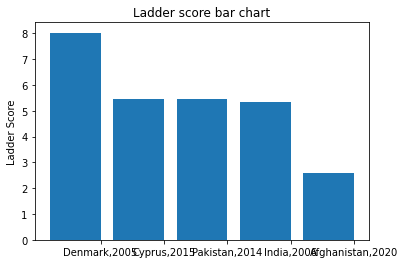

In [ ]:
Countries = ["Denmark,2005", "Cyprus,2015", "Pakistan,2014", "India,2006", "Afghanistan,2020"]
Ladder_score = [8.02, 5.44, 5.44, 5.35, 2.57]

xs = [i + 0.1 for i, _ in enumerate(Countries)] # bars are by default width 0.8, so we'll add 0.1 to the left coordinates # so that each bar is centered
    
plt.bar(xs, Ladder_score) # plot bars with left x-coordinates [xs], heights [num_oscars]
plt.ylabel("Ladder Score")
plt.title("Ladder score bar chart")

plt.xticks([i + 0.5 for i, _ in enumerate(Countries)], Countries) # label x-axis with movie names at bar centers
plt.show()

## **Bar chart 2 - 2020** (max, median, mean, min)



In [ ]:
com_df2020.loc[com_df2020['Ladder score'].idxmax()]

Country name                           Finland
Continent                               Europe
Year                                      2020
Regional indicator              Western Europe
Ladder score                            7.8087
Logged GDP per capita                  10.6393
Social support                         0.95433
Healthy life expectancy                71.9008
Freedom to make life choices          0.949172
Generosity                           -0.059482
Perceptions of corruption             0.195445
Name: 0, dtype: object

In [ ]:
com_df2020.loc[com_df2020['Ladder score'].idxmin()]

Country name                    Afghanistan
Continent                              Asia
Year                                   2020
Regional indicator               South Asia
Ladder score                         2.5669
Logged GDP per capita               7.46286
Social support                     0.470367
Healthy life expectancy               52.59
Freedom to make life choices       0.396573
Generosity                       -0.0964294
Perceptions of corruption          0.933687
Name: 152, dtype: object

In [ ]:
com_df2020['Ladder score'].mean()

5.47323986284967

In [ ]:
com_df2020.loc[com_df2020['Ladder score'].round(2) == 5.46]

,Country name,Continent,Year,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
80,Mongolia,Asia,2020,East Asia,5.4562,9.412187,0.937142,62.304485,0.693351,0.098094,0.863511


In [ ]:
com_df2020['Ladder score'].median()

5.514999866

In [ ]:
com_df2020.loc[com_df2020['Ladder score'].round(2) == 5.51]

,Country name,Continent,Year,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
76,Greece,Europe,2020,Western Europe,5.5150,10.132326,0.814380,72.405258,0.541345,-0.300907,0.859931
77,Hong Kong S.A.R. of China,Asia,2020,East Asia,5.5104,10.934671,0.845969,76.771706,0.779834,0.134980,0.420607


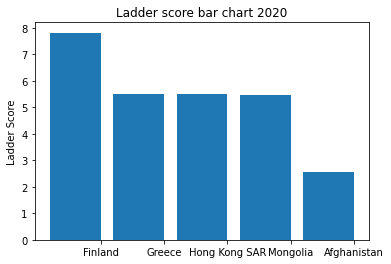

In [ ]:
Countries = ["Finland", "Greece", "Hong Kong SAR", "Mongolia", "Afghanistan"]
Ladder_score = [7.81, 5.51, 5.51, 5.46, 2.57]

xs = [i + 0.1 for i, _ in enumerate(Countries)] # bars are by default width 0.8, so we'll add 0.1 to the left coordinates # so that each bar is centered
    
plt.bar(xs, Ladder_score) # plot bars with left x-coordinates [xs], heights [num_oscars]
plt.ylabel("Ladder Score")
plt.title("Ladder score bar chart 2020")

plt.xticks([i + 0.5 for i, _ in enumerate(Countries)], Countries) # label x-axis with movie names at bar centers
plt.show()

## **REnaming data**

In [17]:
mergedf_dummy = pd.concat([mergedf, pd.get_dummies(mergedf['Continent'])], axis=1)
mergedf_dummy

,Country name,Year,Continent,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Africa,Asia,Europe,North America,Oceania,South America
0,Finland,2020,Europe,Western Europe,7.808700,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,0,0,1,0,0,0
1,Denmark,2020,Europe,Western Europe,7.645600,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,0,0,1,0,0,0
2,Switzerland,2020,Europe,Western Europe,7.559900,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,0,0,1,0,0,0
3,Iceland,2020,Europe,Western Europe,7.504500,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,0,0,1,0,0,0
4,Norway,2020,Europe,Western Europe,7.488000,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,Zimbabwe,2014,Africa,NaN,4.184451,7.562753,0.765839,52.380001,0.642034,-0.048634,0.820217,1,0,0,0,0,0
1700,Zimbabwe,2015,Africa,NaN,3.703191,7.556052,0.735800,53.799999,0.667193,-0.097354,0.810457,1,0,0,0,0,0
1701,Zimbabwe,2016,Africa,NaN,3.735400,7.538829,0.768425,54.400002,0.732971,-0.068105,0.723612,1,0,0,0,0,0
1702,Zimbabwe,2017,Africa,NaN,3.638300,7.549491,0.754147,55.000000,0.752826,-0.069670,0.751208,1,0,0,0,0,0


## **Trying World Regrssion**

*merge_avdf = merge 2005-2020 average*


In [18]:
#sort values by country name
mergedf.sort_values("Country name")


,Country name,Year,Continent,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,2008,Asia,NaN,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686
1,Afghanistan,2009,Asia,NaN,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035
2,Afghanistan,2010,Asia,NaN,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766
3,Afghanistan,2011,Asia,NaN,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109
4,Afghanistan,2012,Asia,NaN,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620
...,...,...,...,...,...,...,...,...,...,...,...
1692,Zimbabwe,2007,Africa,NaN,3.280247,7.313939,0.828113,42.860001,0.455957,-0.061563,0.946287
1691,Zimbabwe,2006,Africa,NaN,3.826268,7.366704,0.821656,41.580002,0.431110,-0.056554,0.904757
1702,Zimbabwe,2017,Africa,NaN,3.638300,7.549491,0.754147,55.000000,0.752826,-0.069670,0.751208
1695,Zimbabwe,2010,Africa,NaN,4.681570,7.296330,0.856638,46.700001,0.664718,-0.066457,0.828361


In [19]:
mergedf.to_csv('mergedf.csv')

In [20]:
mergedf.loc[mergedf['Year'] == 2020]


,Country name,Year,Continent,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,2020,Europe,Western Europe,7.8087,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445
1,Denmark,2020,Europe,Western Europe,7.6456,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489
2,Switzerland,2020,Europe,Western Europe,7.5599,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728
3,Iceland,2020,Europe,Western Europe,7.5045,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710
4,Norway,2020,Europe,Western Europe,7.4880,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218
...,...,...,...,...,...,...,...,...,...,...,...
148,Central African Republic,2020,Africa,Sub-Saharan Africa,3.4759,6.625160,0.319460,45.200001,0.640881,0.082410,0.891807
149,Rwanda,2020,Africa,Sub-Saharan Africa,3.3123,7.600104,0.540835,61.098846,0.900589,0.055484,0.183541
150,Zimbabwe,2020,Africa,Sub-Saharan Africa,3.2992,7.865712,0.763093,55.617260,0.711458,-0.072064,0.810237
151,South Sudan,2020,Africa,Sub-Saharan Africa,2.8166,7.425360,0.553707,51.000000,0.451314,0.016519,0.763417


In [21]:
merge_cols = mergedf.columns.tolist()
merge_cols

['Country name',
 'Year',
 'Continent',
 'Regional indicator',
 'Ladder score',
 'Logged GDP per capita',
 'Social support',
 'Healthy life expectancy',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption']

In [22]:
#group by country name, then average other index
merge_avdf = mergedf.groupby(['Country name']).agg([np.average]) 
merge_avdf

,Year,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
,average,average,average,average,average,average,average,average
Country name,,,,,,,,
Afghanistan,2013.583333,3.610612,7.442769,0.512445,52.282500,0.518255,0.079946,0.844103
Albania,2013.500000,4.981251,9.275256,0.715558,67.375678,0.655647,-0.088691,0.866029
Algeria,2014.750000,5.422276,9.513335,NaN,65.265647,NaN,NaN,NaN
Angola,2012.500000,4.420299,8.713990,0.737973,53.550000,0.455957,-0.077243,0.867018
Argentina,2012.571429,6.331505,9.824620,0.905246,67.793129,0.765321,-0.157771,0.844695
...,...,...,...,...,...,...,...,...
Venezuela,2012.428571,6.121042,9.603871,0.917775,65.877524,0.670128,NaN,0.793891
Vietnam,2012.571429,5.297733,8.506937,NaN,66.918053,NaN,NaN,NaN


In [23]:
merge_avdf.to_csv('merge_avdf.csv')

## **(IGNORE) Trying to clean data for World Regression**
*merge_avdf_drop = merge 2005-2020 average dropped na*

In [ ]:
merge_avdf.columns.tolist()

[('Year', 'average'),
 ('Ladder score', 'average'),
 ('Logged GDP per capita', 'average'),
 ('Social support', 'average'),
 ('Healthy life expectancy', 'average'),
 ('Freedom to make life choices', 'average'),
 ('Generosity', 'average'),
 ('Perceptions of corruption', 'average')]

In [ ]:
merge_av_cols = merge_avdf.columns.tolist()
merge_av_cols

[('Year', 'average'),
 ('Ladder score', 'average'),
 ('Logged GDP per capita', 'average'),
 ('Social support', 'average'),
 ('Healthy life expectancy', 'average'),
 ('Freedom to make life choices', 'average'),
 ('Generosity', 'average'),
 ('Perceptions of corruption', 'average')]

In [ ]:
merge_avdf.rename(columns = {('Year', 'average'): 'Year_average', 
                             ('Ladder score', 'average'): 'Ladder_score_average',
                             ('Logged GDP per capita', 'average'): 'Logged_GDP_per_capita_average', 
                             ('Social support', 'average'): 'Social_support_average', 
                             ('Healthy life expectancy', 'average'): 'Healthy_life_expectancy_average', 
                             ('Freedom to make life choices', 'average'): 'Freedom_to_make_life_choices_average', 
                             ('Generosity', 'average'): 'Generosity_average', 
                             ('Perceptions of corruption', 'average'): 'Peerceptions_of_corruption_average'
                             }, inplace = True)

In [ ]:
merge_av_cols = merge_avdf.columns.tolist()
merge_av_cols

[('Year', 'average'),
 ('Ladder score', 'average'),
 ('Logged GDP per capita', 'average'),
 ('Social support', 'average'),
 ('Healthy life expectancy', 'average'),
 ('Freedom to make life choices', 'average'),
 ('Generosity', 'average'),
 ('Perceptions of corruption', 'average')]

In [ ]:
merge_new_cols = merge_cols[0:1] + merge_cols[2:3] +  merge_cols[3:4] +  merge_av_cols[0:1] + merge_av_cols[3:10]
merge_new_cols

['Country name',
 'Continent',
 'Regional indicator',
 ('Year', 'average'),
 ('Social support', 'average'),
 ('Healthy life expectancy', 'average'),
 ('Freedom to make life choices', 'average'),
 ('Generosity', 'average'),
 ('Perceptions of corruption', 'average')]

In [ ]:
selected_col_df2020 = com_df2020.filter(['Country name', 'Continent', 'Regional indicator'], axis=1)
selected_col_df2020

,Country name,Continent,Regional indicator
0,Finland,Europe,Western Europe
1,Denmark,Europe,Western Europe
2,Switzerland,Europe,Western Europe
3,Iceland,Europe,Western Europe
4,Norway,Europe,Western Europe
...,...,...,...
148,Central African Republic,Africa,Sub-Saharan Africa
149,Rwanda,Africa,Sub-Saharan Africa
150,Zimbabwe,Africa,Sub-Saharan Africa
151,South Sudan,Africa,Sub-Saharan Africa


In [ ]:
selected_col_2020 = selected_col_df2020.columns.tolist()
selected_col_2020

['Country name', 'Continent', 'Regional indicator']

In [ ]:
merge_newdf = merge_avdf.append(selected_col_df2020)


/usr/local/lib/python3.7/dist-packages/pandas/core/indexes/multi.py:3369: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  uniq_tuples = lib.fast_unique_multiple([self._values, other._values], sort=sort)


AttributeError: ignored

In [ ]:
left = pd.selected_col_df2020
right = pd.merge_avdf

In [ ]:
merge_newdf = selected_col_df2020.combine(merge_avdf)


In [ ]:
merge_newdf = merge_avdf.append(selected_col_df2020)


In [ ]:
merge_newdf = com_df2020.loc['Country name', 'Continent', 'Regional indicator'].append(merge_avdf)
merge_newdf = merge_new_cols(merge_avdf, merge_new_cols)

In [ ]:
def select_columns(com_df2020, 'Country name', 'Continent', 'Regional indicator'):
    selected_col_df2020 = com_df2020.loc[:, 'Country name', 'Continent', 'Regional indicator']

selected_columns = ['Country name', 'Continent', 'Regional indicator']
selected_col_df2020 = select_columns(com_df2020, selected_columns)

In [ ]:
merge_newdf = com_df2020.append(com_df2019)

merge_newdf = [merge_new_cols]


In [ ]:
merge_avdf.insert(1, 'Country name', 'NA', True)
merge_avdf.insert(1, 'Continent', 'NA', True)
print(merge_avdf)


In [ ]:
merge_avdf.columns.tolist()

In [ ]:
merge_avdf.rename(columns = {('Year', 'average'):'Year average', 
                             ('Ladder score', 'average'):'Ladder score average', 
                             ('Logged GDP per capita', 'average'):'Logged GDP per capita average', 
                             ('Social support', 'average'):'Social support average', 
                             ('Healthy life expectancy', 'average'):'Healthy life expectancy', 
                             ('Freedom to make life choices', 'average'):'Freedom to make life choices average', 
                             ('Generosity', 'average'):'Generosity average', 
                             ('Perceptions of corruption', 'average'):'Perceptions of corruption'
                            }, inplace = True)
print(merge_avdf)

In [ ]:
merge_avdf_cols =  merge_avdf.columns.tolist()
merge_cols = mergedf.columns.tolist()
merge_avdf_cols = merge_cols[1:4]+ merge_avdf_cols[0:]
len(merge_avdf_cols)


## **World average regression**

*   *merge_avdf = merge 2005-2020 w continent and regions dropped na*
*   *print_world_merge_av_model*

In [24]:
merge_avdf_drop = merge_avdf.dropna()
merge_avdf_drop

,Year,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
,average,average,average,average,average,average,average,average
Country name,,,,,,,,
Afghanistan,2013.583333,3.610612,7.442769,0.512445,52.282500,0.518255,0.079946,0.844103
Albania,2013.500000,4.981251,9.275256,0.715558,67.375678,0.655647,-0.088691,0.866029
Angola,2012.500000,4.420299,8.713990,0.737973,53.550000,0.455957,-0.077243,0.867018
Argentina,2012.571429,6.331505,9.824620,0.905246,67.793129,0.765321,-0.157771,0.844695
Armenia,2012.571429,4.455675,8.938460,0.716897,65.710761,0.554340,-0.184732,0.860060
...,...,...,...,...,...,...,...,...
Uganda,2012.571429,4.243059,7.363625,0.807937,52.007729,0.735926,0.047049,0.843540
Ukraine,2012.571429,4.721445,8.994805,0.873161,62.771913,0.546500,-0.118052,0.934238


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

X = merge_avdf_drop[[
 ('Logged GDP per capita', 'average'),
 ('Social support', 'average'),
 ('Healthy life expectancy', 'average'),
 ('Freedom to make life choices', 'average'),
 ('Generosity', 'average'),
 ('Perceptions of corruption', 'average')]]
Y = merge_avdf_drop[('Ladder score', 'average')]
X = sm.add_constant(X)

#simple OLS model
world_merge_av_model = sm.OLS(Y, X).fit()

print_world_merge_av_model = world_merge_av_model.summary()
print(print_world_merge_av_model)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                                 OLS Regression Results                                
Dep. Variable:     ('Ladder score', 'average')   R-squared:                       0.798
Model:                                     OLS   Adj. R-squared:                  0.784
Method:                          Least Squares   F-statistic:                     58.59
Date:                         Fri, 26 Feb 2021   Prob (F-statistic):           8.38e-29
Time:                                 15:00:42   Log-Likelihood:                -62.373
No. Observations:                           96   AIC:                             138.7
Df Residuals:                               89   BIC:                             156.7
Df Model:                                    6                                         
Covariance Type:                     nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------

## **World regression w/ dummy variables**

*   mergedf_drop = mergedf 2005-2020 data w continent and regions dropped na
*   worlddf = merged 2005-2020 data dropped na w continent dummy

*   world_merge_model
*   world_merge_av_dummy_model



In [25]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

mergedf_drop = mergedf.dropna()

#add region dummies
mergedf_drop_dummy = pd.concat([mergedf_drop, pd.get_dummies(mergedf_drop['Continent'])], axis=1)

#want to take average of past 5 years for regression
worlddf = mergedf_drop_dummy[mergedf_drop_dummy["Year"] >= 2005]
worlddf = worlddf.groupby('Country name').mean()
worlddf.head


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<bound method NDFrame.head of               Year  Ladder score  ...  Oceania  South America
Country name                      ...                        
Afghanistan   2020        2.5669  ...        0              0
Albania       2020        4.8827  ...        0              0
Algeria       2020        5.0051  ...        0              0
Argentina     2020        5.9747  ...        0              1
Armenia       2020        4.6768  ...        0              0
...            ...           ...  ...      ...            ...
Venezuela     2020        5.0532  ...        0              1
Vietnam       2020        5.3535  ...        0              0
Yemen         2020        3.5274  ...        0              0
Zambia        2020        3.7594  ...        0              0
Zimbabwe      2020        3.2992  ...        0              0

[152 rows x 14 columns]>

In [26]:
#Multivariate regression
X = worlddf[['Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
Y = worlddf['Ladder score']

X = sm.add_constant(X)
#simple OLS model
world_merge_model = sm.OLS(Y, X).fit()

print_world_merge_model = world_merge_model.summary()
print(print_world_merge_model)

                            OLS Regression Results                            
Dep. Variable:           Ladder score   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     73.62
Date:                Sat, 27 Feb 2021   Prob (F-statistic):           1.53e-41
Time:                        01:27:08   Log-Likelihood:                -125.59
No. Observations:                 152   AIC:                             265.2
Df Residuals:                     145   BIC:                             286.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [27]:
#Including regional dummies for multivariate regression
X = worlddf[['Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Africa', 'Asia',
               'Europe', 'North America', 'Oceania', 'South America']]
Y = worlddf['Ladder score']

#We do not add a constant to prevent multicollinearity
#simple OLS model
world_merge_dummy_model = sm.OLS(Y, X).fit()

print_world_merge_dummy_model = world_merge_dummy_model.summary()
print(print_world_merge_dummy_model)

                            OLS Regression Results                            
Dep. Variable:           Ladder score   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     48.43
Date:                Sat, 27 Feb 2021   Prob (F-statistic):           3.10e-42
Time:                        01:27:08   Log-Likelihood:                -112.53
No. Observations:                 152   AIC:                             249.1
Df Residuals:                     140   BIC:                             285.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Logged GDP per c

## **Covid effect - T-tests**

*   new_df2020 = 2020 w dummy dropped na
*   new_df2019 = 2005-2019 average w dummy dropped na

In [28]:
com_df2020

,Country name,Continent,Year,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Europe,2020,Western Europe,7.8087,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445
1,Denmark,Europe,2020,Western Europe,7.6456,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489
2,Switzerland,Europe,2020,Western Europe,7.5599,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728
3,Iceland,Europe,2020,Western Europe,7.5045,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710
4,Norway,Europe,2020,Western Europe,7.4880,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218
...,...,...,...,...,...,...,...,...,...,...,...
148,Central African Republic,Africa,2020,Sub-Saharan Africa,3.4759,6.625160,0.319460,45.200001,0.640881,0.082410,0.891807
149,Rwanda,Africa,2020,Sub-Saharan Africa,3.3123,7.600104,0.540835,61.098846,0.900589,0.055484,0.183541
150,Zimbabwe,Africa,2020,Sub-Saharan Africa,3.2992,7.865712,0.763093,55.617260,0.711458,-0.072064,0.810237
151,South Sudan,Africa,2020,Sub-Saharan Africa,2.8166,7.425360,0.553707,51.000000,0.451314,0.016519,0.763417


In [29]:
com_df2020_drop = com_df2020.dropna()
com_df2020_drop

,Country name,Continent,Year,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Europe,2020,Western Europe,7.8087,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445
1,Denmark,Europe,2020,Western Europe,7.6456,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489
2,Switzerland,Europe,2020,Western Europe,7.5599,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728
3,Iceland,Europe,2020,Western Europe,7.5045,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710
4,Norway,Europe,2020,Western Europe,7.4880,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218
...,...,...,...,...,...,...,...,...,...,...,...
148,Central African Republic,Africa,2020,Sub-Saharan Africa,3.4759,6.625160,0.319460,45.200001,0.640881,0.082410,0.891807
149,Rwanda,Africa,2020,Sub-Saharan Africa,3.3123,7.600104,0.540835,61.098846,0.900589,0.055484,0.183541
150,Zimbabwe,Africa,2020,Sub-Saharan Africa,3.2992,7.865712,0.763093,55.617260,0.711458,-0.072064,0.810237
151,South Sudan,Africa,2020,Sub-Saharan Africa,2.8166,7.425360,0.553707,51.000000,0.451314,0.016519,0.763417


In [30]:
#add region dummies
com_df2020_drop_dummy = pd.concat([com_df2020_drop, pd.get_dummies(com_df2020_drop['Continent'])], axis=1)


new_df2020 = com_df2020_drop_dummy.groupby('Country name').mean()
new_df2020.head()

,Year,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Africa,Asia,Europe,North America,Oceania,South America
Country name,,,,,,,,,,,,,,
Afghanistan,2020,2.5669,7.462861,0.470367,52.590000,0.396573,-0.096429,0.933687,0,1,0,0,0,0
Albania,2020,4.8827,9.417931,0.671070,68.708138,0.781994,-0.042309,0.896304,0,0,1,0,0,0
Algeria,2020,5.0051,9.537965,0.803385,65.905174,0.466611,-0.121105,0.735485,1,0,0,0,0,0
Argentina,2020,5.9747,9.810955,0.900568,68.803802,0.831132,-0.194914,0.842010,0,0,0,0,0,1
Armenia,2020,4.6768,9.100476,0.757479,66.750656,0.712018,-0.138780,0.773545,0,1,0,0,0,0


In [31]:
com_df2019

,Country name,Year,Continent,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,2008,Asia,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686
1,Afghanistan,2009,Asia,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035
2,Afghanistan,2010,Asia,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766
3,Afghanistan,2011,Asia,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109
4,Afghanistan,2012,Asia,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620
...,...,...,...,...,...,...,...,...,...,...
1699,Zimbabwe,2014,Africa,4.184451,7.562753,0.765839,52.380001,0.642034,-0.048634,0.820217
1700,Zimbabwe,2015,Africa,3.703191,7.556052,0.735800,53.799999,0.667193,-0.097354,0.810457
1701,Zimbabwe,2016,Africa,3.735400,7.538829,0.768425,54.400002,0.732971,-0.068105,0.723612
1702,Zimbabwe,2017,Africa,3.638300,7.549491,0.754147,55.000000,0.752826,-0.069670,0.751208


In [32]:
com_df2019_drop = com_df2019.dropna()
com_df2019_drop

,Country name,Year,Continent,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,2008,Asia,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686
1,Afghanistan,2009,Asia,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035
2,Afghanistan,2010,Asia,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766
3,Afghanistan,2011,Asia,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109
4,Afghanistan,2012,Asia,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620
...,...,...,...,...,...,...,...,...,...,...
1699,Zimbabwe,2014,Africa,4.184451,7.562753,0.765839,52.380001,0.642034,-0.048634,0.820217
1700,Zimbabwe,2015,Africa,3.703191,7.556052,0.735800,53.799999,0.667193,-0.097354,0.810457
1701,Zimbabwe,2016,Africa,3.735400,7.538829,0.768425,54.400002,0.732971,-0.068105,0.723612
1702,Zimbabwe,2017,Africa,3.638300,7.549491,0.754147,55.000000,0.752826,-0.069670,0.751208


In [33]:
#add region dummies
com_df2019_drop_dummy = pd.concat([com_df2019_drop, pd.get_dummies(com_df2019_drop['Continent'])], axis=1)


new_df2019 = com_df2019_drop_dummy.groupby('Country name').mean()
new_df2019.head()

,Year,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Africa,Asia,Europe,North America,Oceania,South America
Country name,,,,,,,,,,,,,,
Afghanistan,2013.000000,3.705495,7.440942,0.516270,52.254545,0.529317,0.095981,0.835959,0,1,0,0,0,0
Albania,2012.909091,4.990211,9.262286,0.719602,67.254545,0.644161,-0.092908,0.863277,0,0,1,0,0,0
Algeria,2014.500000,5.303447,9.513910,0.813759,65.270000,0.534069,-0.191050,0.696644,1,0,0,0,0,0
Angola,2012.500000,4.420299,8.713990,0.737973,53.550000,0.455957,-0.077243,0.867018,1,0,0,0,0,0
Argentina,2012.000000,6.358951,9.825671,0.905605,67.715385,0.760258,-0.154914,0.844901,0,0,0,0,0,1


In [34]:
import statsmodels.api as sm
import statsmodels.formula.api as smf


#Multivariate regression
X = new_df2020[['Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
Y = new_df2020['Ladder score']

X = sm.add_constant(X)
#simple OLS model
model2020 = sm.OLS(Y, X).fit()

print_model2020 = model2020.summary()
print(print_model2020)

                            OLS Regression Results                            
Dep. Variable:           Ladder score   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     73.62
Date:                Sat, 27 Feb 2021   Prob (F-statistic):           1.53e-41
Time:                        01:27:10   Log-Likelihood:                -125.59
No. Observations:                 152   AIC:                             265.2
Df Residuals:                     145   BIC:                             286.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [35]:
print(model2020.params)

const                          -2.159131
Logged GDP per capita           0.216910
Social support                  2.776153
Healthy life expectancy         0.037385
Freedom to make life choices    1.795606
Generosity                      0.431292
Perceptions of corruption      -0.589980
dtype: float64


In [36]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#Multivariate regression
X = new_df2019[['Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
Y = new_df2019['Ladder score']

X = sm.add_constant(X)
#simple OLS model
model2019 = sm.OLS(Y, X).fit()

print_model2019 = model2019.summary()
print(print_model2019)

                            OLS Regression Results                            
Dep. Variable:           Ladder score   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     110.4
Date:                Sat, 27 Feb 2021   Prob (F-statistic):           1.84e-52
Time:                        01:27:10   Log-Likelihood:                -102.46
No. Observations:                 157   AIC:                             218.9
Df Residuals:                     150   BIC:                             240.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [37]:
print(model2019.params)

const                          -2.058601
Logged GDP per capita           0.267509
Social support                  2.643838
Healthy life expectancy         0.037162
Freedom to make life choices    1.202061
Generosity                      0.529896
Perceptions of corruption      -0.455230
dtype: float64


In [38]:
#t-test for Logged GDP per capita

from scipy.stats import ttest_ind
import numpy as np

Logged_GDP_per_capita_2020 = np.random.normal(0.2169,0.082,157)
Logged_GDP_per_capita_2019 = np.random.normal(0.2675,0.067,157)

ttest,pval = ttest_ind(Logged_GDP_per_capita_2019, Logged_GDP_per_capita_2020)

print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis. Logged GDP per capital of 2020 is significantly different from the average of 2005-2019's.")
else:
  print("we accept null hypothesis. Logged GDP per capital of 2020 is not significantly different from the average of 2005-2019's.")

p-value 0.00011420966514192377
we reject null hypothesis. Logged GDP per capital of 2020 is significantly different from the average of 2005-2019's.


In [39]:
#t-test for Social support

from scipy.stats import ttest_ind
import numpy as np

Social_support_2020 = np.random.normal(2.7762,0.658,157)
Social_support_2019 = np.random.normal(2.6438,0.522,157)

ttest,pval = ttest_ind(Social_support_2020, Social_support_2019)

print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis. Social support of 2020 is significantly different from the average of 2005-2019's.")
else:
  print("we accept null hypothesis. Social support of 2020 is not significantly different from the average of 2005-2019's.")

p-value 0.017279940329705666
we reject null hypothesis. Social support of 2020 is significantly different from the average of 2005-2019's.


In [40]:
#t-test for Healthy life expectancy

from scipy.stats import ttest_ind
import numpy as np

Healthy_life_expectancy_2020 = np.random.normal(0.0374,0.013,157)
Healthy_life_expectancy_2019 = np.random.normal(0.0372,0.009,157)

ttest,pval = ttest_ind(Healthy_life_expectancy_2020, Healthy_life_expectancy_2019)

print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis. Healthy life expectancy of 2020 is significantly different from the average of 2005-2019's.")
else:
  print("we accept null hypothesis. Healthy life expectancy of 2020 is not significantly different from the average of 2005-2019's.")

p-value 0.7431559941441679
we accept null hypothesis. Healthy life expectancy of 2020 is not significantly different from the average of 2005-2019's.


In [41]:
#t-test for Freedom to make life choices

from scipy.stats import ttest_ind
import numpy as np

Freedom_to_make_life_choices_2020 = np.random.normal(1.7956,0.495,157)
Freedom_to_make_life_choices_2019 = np.random.normal(1.2021,0.397,157)

ttest,pval = ttest_ind(Freedom_to_make_life_choices_2020, Freedom_to_make_life_choices_2019)

print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis. Freedom to make life choices of 2020 is significantly different from the average of 2005-2019's.")
else:
  print("we accept null hypothesis. Freedom to make life choicesy of 2020 is not significantly different from the average of 2005-2019's.")

p-value 2.1666326330810635e-37
we reject null hypothesis. Freedom to make life choices of 2020 is significantly different from the average of 2005-2019's.


In [42]:
#t-test for Generosity

from scipy.stats import ttest_ind
import numpy as np

Generosity_2020 = np.random.normal(0.4313,0.335,157)
Generosity_2019 = np.random.normal(0.5299,0.293,157)

ttest,pval = ttest_ind(Generosity_2020, Generosity_2019)

print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis. Generosity of 2020 is significantly different from the average of 2005-2019's.")
else:
  print("we accept null hypothesis. Generosity of 2020 is not significantly different from the average of 2005-2019's.")

p-value 0.00020585403331765297
we reject null hypothesis. Generosity of 2020 is significantly different from the average of 2005-2019's.


In [43]:
#t-test for Perceptions of corruption

from scipy.stats import ttest_ind
import numpy as np

Perceptions_of_corruption_2020 = np.random.normal(-0.5900,0.314,157)
Perceptions_of_corruption_2019 = np.random.normal(-0.4552,0.262,157)

ttest,pval = ttest_ind(Perceptions_of_corruption_2020, Perceptions_of_corruption_2019)

print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis. Perceptions of corruption of 2020 is significantly different from the average of 2005-2019's.")
else:
  print("we accept null hypothesis. Perceptions of corruption of 2020 is not significantly different from the average of 2005-2019's.")

p-value 2.657587717430899e-07
we reject null hypothesis. Perceptions of corruption of 2020 is significantly different from the average of 2005-2019's.


In [44]:
#Result: 2020data vs 2005-2019average data

#Coeffcitent of t-test: 

#Logged GDP per capita  ->SIGNIFICANTLY DIFFERENT
#Social support ->NOT significantly different
#Healthy life expectancy  -> NOT significantly different
#Freedom to make life choices ->SIGNIFICANTLY DIFFERENT
#Generosity  -> NOT significantly different
#Perceptions of corruption ->SIGNIFICANTLY DIFFERENT

#significantly different: Logged GDP per capita, Freedom to make life choices,Perceptions of corruption
#not significantly different: Social support,Healthy life expectancy,Generosity

## **Covid effect - Difference-in-difference - Data cleaning and analysis**

In [45]:
worlddf.head()

,Year,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Africa,Asia,Europe,North America,Oceania,South America
Country name,,,,,,,,,,,,,,
Afghanistan,2020,2.5669,7.462861,0.470367,52.590000,0.396573,-0.096429,0.933687,0,1,0,0,0,0
Albania,2020,4.8827,9.417931,0.671070,68.708138,0.781994,-0.042309,0.896304,0,0,1,0,0,0
Algeria,2020,5.0051,9.537965,0.803385,65.905174,0.466611,-0.121105,0.735485,1,0,0,0,0,0
Argentina,2020,5.9747,9.810955,0.900568,68.803802,0.831132,-0.194914,0.842010,0,0,0,0,0,1
Armenia,2020,4.6768,9.100476,0.757479,66.750656,0.712018,-0.138780,0.773545,0,1,0,0,0,0


In [46]:
mergedf_dummy = pd.concat([mergedf, pd.get_dummies(mergedf['Continent'])], axis=1)
mergedf_dummy

,Country name,Year,Continent,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Africa,Asia,Europe,North America,Oceania,South America
0,Finland,2020,Europe,Western Europe,7.808700,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,0,0,1,0,0,0
1,Denmark,2020,Europe,Western Europe,7.645600,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,0,0,1,0,0,0
2,Switzerland,2020,Europe,Western Europe,7.559900,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,0,0,1,0,0,0
3,Iceland,2020,Europe,Western Europe,7.504500,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,0,0,1,0,0,0
4,Norway,2020,Europe,Western Europe,7.488000,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,Zimbabwe,2014,Africa,NaN,4.184451,7.562753,0.765839,52.380001,0.642034,-0.048634,0.820217,1,0,0,0,0,0
1700,Zimbabwe,2015,Africa,NaN,3.703191,7.556052,0.735800,53.799999,0.667193,-0.097354,0.810457,1,0,0,0,0,0
1701,Zimbabwe,2016,Africa,NaN,3.735400,7.538829,0.768425,54.400002,0.732971,-0.068105,0.723612,1,0,0,0,0,0
1702,Zimbabwe,2017,Africa,NaN,3.638300,7.549491,0.754147,55.000000,0.752826,-0.069670,0.751208,1,0,0,0,0,0


Text(0.5, 1.0, 'Continent Ladder score')

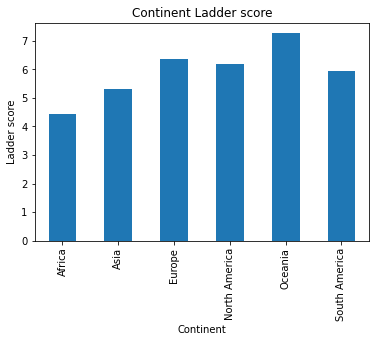

In [135]:
mergedf_dummy.groupby('Continent')['Ladder score'].mean().plot.bar()
plt.ylabel('Ladder score')
plt.title('Continent Ladder score')


## **Africa**

In [48]:
mergedf_dummy_Africa = mergedf_dummy.loc[mergedf_dummy['Africa']==1]
mergedf_dummy_Africa

,Country name,Year,Continent,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Africa,Asia,Europe,North America,Oceania,South America
48,Mauritius,2020,Africa,Sub-Saharan Africa,6.101300,9.956786,0.910358,66.404343,0.889535,-0.018319,0.805343,1,0,0,0,0,0
79,Libya,2020,Africa,Middle East and North Africa,5.488800,9.789816,0.825943,62.299999,0.773157,-0.085054,0.668779,1,0,0,0,0,0
84,Ivory Coast,2020,Africa,Sub-Saharan Africa,5.233300,8.225561,0.658049,49.503773,0.727909,-0.043991,0.790772,1,0,0,0,0,0
85,Benin,2020,Africa,Sub-Saharan Africa,5.216000,7.674320,0.468671,54.312466,0.735183,-0.003537,0.740533,1,0,0,0,0,0
87,Congo (Brazzaville),2020,Africa,Sub-Saharan Africa,5.194400,8.536987,0.640228,57.924480,0.719059,-0.123674,0.751779,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,Zimbabwe,2014,Africa,NaN,4.184451,7.562753,0.765839,52.380001,0.642034,-0.048634,0.820217,1,0,0,0,0,0
1700,Zimbabwe,2015,Africa,NaN,3.703191,7.556052,0.735800,53.799999,0.667193,-0.097354,0.810457,1,0,0,0,0,0
1701,Zimbabwe,2016,Africa,NaN,3.735400,7.538829,0.768425,54.400002,0.732971,-0.068105,0.723612,1,0,0,0,0,0
1702,Zimbabwe,2017,Africa,NaN,3.638300,7.549491,0.754147,55.000000,0.752826,-0.069670,0.751208,1,0,0,0,0,0


In [49]:
mergedf_dummy_Africa_country = mergedf_dummy_Africa.groupby('Country name').mean()
mergedf_dummy_Africa_country

,Year,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Africa,Asia,Europe,North America,Oceania,South America
Country name,,,,,,,,,,,,,,
Algeria,2014.750000,5.422276,9.513335,0.803600,65.265647,0.532597,-0.185731,0.690017,1,0,0,0,0,0
Angola,2012.500000,4.420299,8.713990,0.737973,53.550000,0.455957,-0.077243,0.867018,1,0,0,0,0,0
Benin,2013.636364,4.037141,7.578226,0.476899,52.701133,0.734423,-0.034510,0.811221,1,0,0,0,0,0
Botswana,2013.333333,3.997078,9.603648,0.826555,54.942038,0.820295,-0.200334,0.780978,1,0,0,0,0,0
Burkina Faso,2012.846154,4.170437,7.336630,0.741544,50.973035,0.651598,-0.026853,0.763185,1,0,0,0,0,0
Burundi,2013.333333,3.585987,6.606074,0.429764,51.330001,0.480237,-0.029945,0.711381,1,0,0,0,0,0
Cameroon,2012.571429,4.588740,8.041190,0.713376,49.400353,0.742109,-0.019657,0.884300,1,0,0,0,0,0
Central African Republic,2013.500000,3.508445,6.654580,0.388709,43.663335,0.673838,0.051922,0.850409,1,0,0,0,0,0
Chad,2012.571429,4.057514,7.525947,0.666440,45.880039,0.503115,-0.006194,0.868379,1,0,0,0,0,0


In [50]:
mergedf_dummy_Africa_gyear = mergedf_dummy_Africa.groupby('Year').mean()
mergedf_dummy_Africa_gyear

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Africa,Asia,Europe,North America,Oceania,South America
Year,,,,,,,,,,,,,
2005,5.167754,8.987387,0.847842,59.700001,0.817362,NaN,NaN,1,0,0,0,0,0
2006,4.074250,7.559024,0.729209,47.149091,0.672172,0.009233,0.780516,1,0,0,0,0,0
2007,4.435917,7.641941,0.710131,48.010476,0.667636,0.018155,0.818938,1,0,0,0,0,0
2008,4.296343,7.672813,0.661984,49.831852,0.596642,-0.002881,0.843317,1,0,0,0,0,0
2009,4.421333,7.742447,0.744798,51.326666,0.655635,-0.000353,0.795563,1,0,0,0,0,0
2010,4.335638,7.949134,0.786835,52.576000,0.691419,-0.034443,0.787402,1,0,0,0,0,0
2011,4.495338,7.928633,0.727328,53.136842,0.689970,-0.056727,0.775270,1,0,0,0,0,0
2012,4.413454,8.090083,0.740765,54.440606,0.637035,-0.052560,0.786428,1,0,0,0,0,0
2013,4.088387,7.996518,0.723683,53.780645,0.670241,-0.044625,0.792638,1,0,0,0,0,0


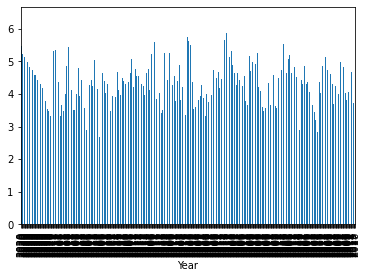

In [51]:
mergedf_dummy_Africa.set_index('Year')['Ladder score'].plot.bar()

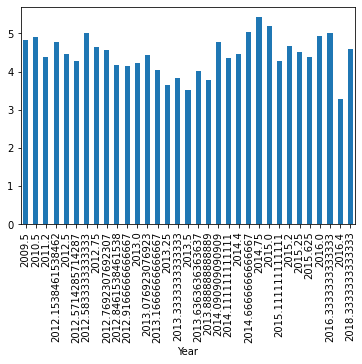

In [52]:
mergedf_dummy_Africa_country.groupby('Year')['Ladder score'].mean().plot.bar()

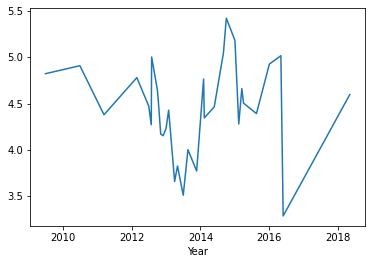

In [53]:
mergedf_dummy_Africa_country.groupby('Year')['Ladder score'].mean().plot()

In [54]:
mergedf_dummy_Africa_gyear.insert(1, 'Year', 'NA', True)
mergedf_dummy_Africa_gyear 

,Ladder score,Year,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Africa,Asia,Europe,North America,Oceania,South America
Year,,,,,,,,,,,,,,
2005,5.167754,NA,8.987387,0.847842,59.700001,0.817362,NaN,NaN,1,0,0,0,0,0
2006,4.074250,NA,7.559024,0.729209,47.149091,0.672172,0.009233,0.780516,1,0,0,0,0,0
2007,4.435917,NA,7.641941,0.710131,48.010476,0.667636,0.018155,0.818938,1,0,0,0,0,0
2008,4.296343,NA,7.672813,0.661984,49.831852,0.596642,-0.002881,0.843317,1,0,0,0,0,0
2009,4.421333,NA,7.742447,0.744798,51.326666,0.655635,-0.000353,0.795563,1,0,0,0,0,0
2010,4.335638,NA,7.949134,0.786835,52.576000,0.691419,-0.034443,0.787402,1,0,0,0,0,0
2011,4.495338,NA,7.928633,0.727328,53.136842,0.689970,-0.056727,0.775270,1,0,0,0,0,0
2012,4.413454,NA,8.090083,0.740765,54.440606,0.637035,-0.052560,0.786428,1,0,0,0,0,0
2013,4.088387,NA,7.996518,0.723683,53.780645,0.670241,-0.044625,0.792638,1,0,0,0,0,0


In [55]:
data_Af = [['2005', 5.167754], ['2006', 4.074250], ['2007', 4.435917]
        , ['2008', 4.296343], ['2009', 4.421333], ['2010', 4.335638], ['2011', 4.4953380]
        , ['2012', 4.413454], ['2013', 4.088387], ['2014', 4.184657], ['2015', 4.314277]
        , ['2016', 4.237311], ['2017', 4.414116], ['2018', 4.560497], ['2020', 4.433832]]
  
# Create the pandas DataFrame 
import pandas as pd 
df_Africa_year_ladderscore = pd.DataFrame(data_Af, columns = ['Year', 'Ladder score'])
df_Africa_year_ladderscore

,Year,Ladder score
0,2005,5.167754
1,2006,4.074250
2,2007,4.435917
3,2008,4.296343
4,2009,4.421333
5,2010,4.335638
6,2011,4.495338
7,2012,4.413454
8,2013,4.088387
9,2014,4.184657


In [56]:
Africa_year_ladderscore = {'2005': 5.167754, '2006': 4.074250, '2007': 4.435917, '2008': 4.296343,
    '2009': 4.421333, '2010': 4.335638, '2011': 4.495338, '2012': 4.413454, '2013': 4.088387,
    '2014': 4.184657, '2015': 4.314277	, '2016': 4.237311, '2017': 4.414116, '2018': 4.560497,
    '2020': 4.433832}

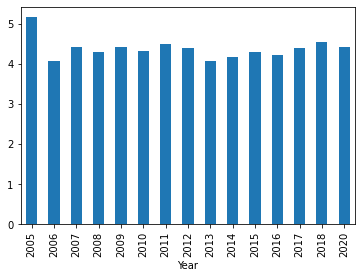

In [57]:
df_Africa_year_ladderscore.set_index('Year')['Ladder score'].plot.bar()

## **Europe**

In [58]:
mergedf_dummy_Europe = mergedf_dummy.loc[mergedf_dummy['Europe']==1]
mergedf_dummy_Europe

,Country name,Year,Continent,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Africa,Asia,Europe,North America,Oceania,South America
0,Finland,2020,Europe,Western Europe,7.808700,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,0,0,1,0,0,0
1,Denmark,2020,Europe,Western Europe,7.645600,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,0,0,1,0,0,0
2,Switzerland,2020,Europe,Western Europe,7.559900,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,0,0,1,0,0,0
3,Iceland,2020,Europe,Western Europe,7.504500,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,0,0,1,0,0,0
4,Norway,2020,Europe,Western Europe,7.488000,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599,United Kingdom,2014,Europe,NaN,6.758148,10.551946,0.910247,71.620003,0.857040,0.350521,0.484118,0,0,1,0,0,0
1600,United Kingdom,2015,Europe,NaN,6.515445,10.567184,0.935986,71.699997,0.832926,0.295850,0.456134,0,0,1,0,0,0
1601,United Kingdom,2016,Europe,NaN,6.824284,10.579217,0.954068,71.900002,0.821192,0.245972,0.458313,0,0,1,0,0,0
1602,United Kingdom,2017,Europe,NaN,7.103273,10.590446,0.937495,72.099998,0.812733,0.286916,0.418611,0,0,1,0,0,0


In [59]:
mergedf_dummy_Europe_gyear = mergedf_dummy_Europe.groupby('Year').mean()
mergedf_dummy_Europe_gyear

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Africa,Asia,Europe,North America,Oceania,South America
Year,,,,,,,,,,,,,
2005,6.649996,10.351178,0.930138,69.164286,0.858672,NaN,0.738295,0,0,1,0,0,0
2006,6.099360,10.097928,0.921615,66.786667,0.781549,-0.038464,0.693183,0,0,1,0,0,0
2007,5.781829,9.895901,0.874274,66.731871,0.661422,-0.037041,0.800729,0,0,1,0,0,0
2008,6.604253,10.256802,0.920188,68.507312,0.773027,0.025205,0.665772,0,0,1,0,0,0
2009,5.862517,9.973937,0.874630,67.816808,0.654238,-0.013769,0.773305,0,0,1,0,0,0
2010,5.951117,10.055739,0.877040,68.398058,0.698139,-0.016290,0.766511,0,0,1,0,0,0
2011,5.954311,10.071968,0.881470,68.419953,0.731555,-0.027617,0.769733,0,0,1,0,0,0
2012,6.085368,10.130725,0.883268,68.904430,0.724110,-0.018368,0.752592,0,0,1,0,0,0
2013,6.004509,10.096579,0.874186,68.882793,0.727424,-0.017632,0.759705,0,0,1,0,0,0


In [60]:
data_EU = [['2005', 6.649996], ['2006', 6.099360], ['2007', 5.781829]
        , ['2008', 6.604253], ['2009', 5.862517], ['2010', 	5.951117], ['2011', 5.954311]
        , ['2012', 6.085368], ['2013', 6.004509	], ['2014', 6.046050], ['2015', 6.097782]
        , ['2016', 6.172618], ['2017', 6.285215	], ['2018', 6.377821], ['2020', 6.361440]]
  
# Create the pandas DataFrame 
import pandas as pd 
df_Europe_year_ladderscore = pd.DataFrame(data_EU, columns = ['Year', 'Ladder score'])
df_Europe_year_ladderscore

,Year,Ladder score
0,2005,6.649996
1,2006,6.099360
2,2007,5.781829
3,2008,6.604253
4,2009,5.862517
5,2010,5.951117
6,2011,5.954311
7,2012,6.085368
8,2013,6.004509
9,2014,6.046050


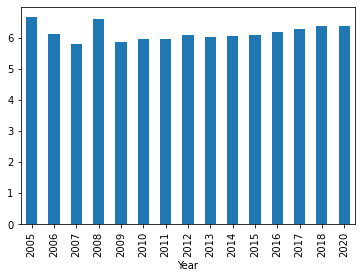

In [61]:
df_Europe_year_ladderscore.set_index('Year')['Ladder score'].plot.bar()

## **North America**

In [ ]:
mergedf_dummy_North_America = mergedf_dummy.loc[mergedf_dummy['North America']==1]
mergedf_dummy_North_America

,Country name,Year,Continent,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Africa,Asia,Europe,North America,Oceania,South America
10,Canada,2020,North America,North America and ANZ,7.232100,10.692369,0.927177,73.601601,0.933913,0.124771,0.390843,0,0,0,1,0,0
14,Costa Rica,2020,North America,Latin America and Caribbean,7.121400,9.658156,0.901546,71.299850,0.934739,-0.102430,0.786332,0,0,0,1,0,0
17,United States,2020,North America,North America and ANZ,6.939600,10.925769,0.914219,68.299500,0.842620,0.149892,0.699715,0,0,0,1,0,0
23,Mexico,2020,North America,Latin America and Caribbean,6.465000,9.797797,0.838665,68.299026,0.858709,-0.175267,0.806822,0,0,0,1,0,0
28,Guatemala,2020,North America,Latin America and Caribbean,6.398900,8.924806,0.816621,64.808945,0.908148,-0.042939,0.783237,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1612,United States,2014,North America,NaN,7.151114,10.857497,0.902097,68.620003,0.866077,0.212869,0.702267,0,0,0,1,0,0
1613,United States,2015,North America,NaN,6.863947,10.878154,0.903571,68.599998,0.848753,0.210956,0.697543,0,0,0,1,0,0
1614,United States,2016,North America,NaN,6.803600,10.885554,0.896751,68.500000,0.757893,0.135592,0.738920,0,0,0,1,0,0
1615,United States,2017,North America,NaN,6.991759,10.900906,0.921003,68.400002,0.868497,0.188833,0.681191,0,0,0,1,0,0


In [ ]:
mergedf_dummy_North_America_gyear = mergedf_dummy_North_America.groupby('Year').mean()
mergedf_dummy_North_America_gyear

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Africa,Asia,Europe,North America,Oceania,South America
Year,,,,,,,,,,,,,
2005,6.999353,10.137788,0.932180,68.750000,0.885526,0.244575,0.633465,0,0,0,1,0,0
2006,5.679279,9.103454,0.895780,63.706667,0.715462,0.080704,0.816533,0,0,0,1,0,0
2007,6.276764,9.319171,0.857964,65.656364,0.764082,0.094078,0.755222,0,0,0,1,0,0
2008,6.074320,9.287834,0.857648,63.753332,0.749657,0.104382,0.769218,0,0,0,1,0,0
2009,6.636596,9.339681,0.863241,66.454000,0.762032,0.068222,0.737777,0,0,0,1,0,0
2010,6.299308,9.181251,0.844980,63.527272,0.743183,0.075814,0.743271,0,0,0,1,0,0
2011,6.068720,9.283291,0.819824,64.158462,0.792643,0.038696,0.768989,0,0,0,1,0,0
2012,6.081886,9.238758,0.847948,64.709090,0.787462,0.051223,0.724156,0,0,0,1,0,0
2013,6.201498,9.322873,0.846936,65.198463,0.804034,0.059119,0.752830,0,0,0,1,0,0


## **Oceania**

In [62]:
mergedf_dummy_Oceania = mergedf_dummy.loc[mergedf_dummy['Oceania']==1]
mergedf_dummy_Oceania

,Country name,Year,Continent,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Africa,Asia,Europe,North America,Oceania,South America
7,New Zealand,2020,Oceania,North America and ANZ,7.299600,10.500943,0.949119,73.202629,0.936217,0.191598,0.221139,0,0,0,0,1,0
11,Australia,2020,Oceania,North America and ANZ,7.222800,10.720596,0.944855,73.604538,0.915432,0.190460,0.415169,0,0,0,0,1,0
59,Australia,2005,Oceania,NaN,7.340688,10.569470,0.967892,71.400002,0.934973,NaN,0.390416,0,0,0,0,1,0
60,Australia,2007,Oceania,NaN,7.285391,10.613497,0.965276,71.720001,0.890682,0.338664,0.512578,0,0,0,0,1,0
61,Australia,2008,Oceania,NaN,7.253757,10.629381,0.946635,71.879997,0.915733,0.296854,0.430811,0,0,0,0,1,0
62,Australia,2010,Oceania,NaN,7.450047,10.632582,0.954520,72.199997,0.932059,0.308317,0.366127,0,0,0,0,1,0
63,Australia,2011,Oceania,NaN,7.405616,10.642902,0.967029,72.300003,0.944586,0.360890,0.381772,0,0,0,0,1,0
64,Australia,2012,Oceania,NaN,7.195586,10.663229,0.944599,72.400002,0.935146,0.265169,0.368252,0,0,0,0,1,0
65,Australia,2013,Oceania,NaN,7.364169,10.671698,0.928205,72.500000,0.933379,0.260280,0.431539,0,0,0,0,1,0
66,Australia,2014,Oceania,NaN,7.288550,10.681601,0.923799,72.599998,0.922932,0.310035,0.442021,0,0,0,0,1,0


In [63]:
mergedf_dummy_Oceania_gyear = mergedf_dummy_Oceania.groupby('Year').mean()
mergedf_dummy_Oceania_gyear

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Africa,Asia,Europe,North America,Oceania,South America
Year,,,,,,,,,,,,,
2005,7.340688,10.569470,0.967892,71.400002,0.934973,NaN,0.390416,0,0,0,0,1,0
2006,7.305014,10.366242,0.946047,71.199997,0.932080,0.308866,0.224220,0,0,0,0,1,0
2007,7.444782,10.503664,0.965904,71.560001,0.884450,0.307073,0.403597,0,0,0,0,1,0
2008,7.317464,10.499575,0.945455,71.739998,0.904403,0.295914,0.382281,0,0,0,0,1,0
2010,7.336902,10.504896,0.965081,72.099998,0.924906,0.279433,0.343438,0,0,0,0,1,0
2011,7.298127,10.519544,0.960340,72.210003,0.939678,0.320552,0.325551,0,0,0,0,1,0
2012,7.222608,10.539310,0.937314,72.320000,0.918500,0.274078,0.328775,0,0,0,0,1,0
2013,7.322160,10.549692,0.943179,72.430000,0.938690,0.246659,0.371887,0,0,0,0,1,0
2014,7.297221,10.564510,0.933090,72.540001,0.927407,0.327011,0.357315,0,0,0,0,1,0


In [64]:
data_OC = [['2005', 7.340688], ['2006', 	7.305014], ['2007', 7.444782	]
        , ['2008', 7.317464], ['2010', 	7.336902], ['2011', 7.298127	]
        , ['2012', 7.222608], ['2013', 7.322160	], ['2014', 7.297221], ['2015', 7.363591]
        , ['2016', 7.237884], ['2017', 7.292110	], ['2018', 7.273640	], ['2020', 7.261200]]
  
# Create the pandas DataFrame 
import pandas as pd 
df_Oceania_year_ladderscore = pd.DataFrame(data_OC, columns = ['Year', 'Ladder score'])
df_Oceania_year_ladderscore

,Year,Ladder score
0,2005,7.340688
1,2006,7.305014
2,2007,7.444782
3,2008,7.317464
4,2010,7.336902
5,2011,7.298127
6,2012,7.222608
7,2013,7.322160
8,2014,7.297221
9,2015,7.363591


Text(0.5, 1.0, 'Oceania year average')

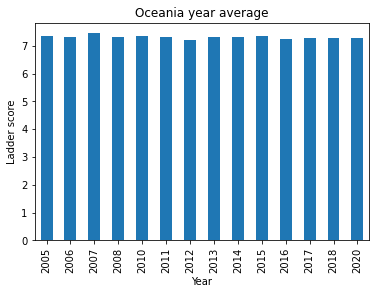

In [120]:
df_Oceania_year_ladderscore.set_index('Year')['Ladder score'].plot.bar()
plt.ylabel('Ladder score')
plt.title('Oceania year average')

## **Covid effect - Difference-in-difference - Graph**

In [66]:
mergedf_dummy_AE = mergedf_dummy_Africa.append(mergedf_dummy_Europe)
mergedf_dummy_AE

,Country name,Year,Continent,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Africa,Asia,Europe,North America,Oceania,South America
48,Mauritius,2020,Africa,Sub-Saharan Africa,6.101300,9.956786,0.910358,66.404343,0.889535,-0.018319,0.805343,1,0,0,0,0,0
79,Libya,2020,Africa,Middle East and North Africa,5.488800,9.789816,0.825943,62.299999,0.773157,-0.085054,0.668779,1,0,0,0,0,0
84,Ivory Coast,2020,Africa,Sub-Saharan Africa,5.233300,8.225561,0.658049,49.503773,0.727909,-0.043991,0.790772,1,0,0,0,0,0
85,Benin,2020,Africa,Sub-Saharan Africa,5.216000,7.674320,0.468671,54.312466,0.735183,-0.003537,0.740533,1,0,0,0,0,0
87,Congo (Brazzaville),2020,Africa,Sub-Saharan Africa,5.194400,8.536987,0.640228,57.924480,0.719059,-0.123674,0.751779,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599,United Kingdom,2014,Europe,NaN,6.758148,10.551946,0.910247,71.620003,0.857040,0.350521,0.484118,0,0,1,0,0,0
1600,United Kingdom,2015,Europe,NaN,6.515445,10.567184,0.935986,71.699997,0.832926,0.295850,0.456134,0,0,1,0,0,0
1601,United Kingdom,2016,Europe,NaN,6.824284,10.579217,0.954068,71.900002,0.821192,0.245972,0.458313,0,0,1,0,0,0
1602,United Kingdom,2017,Europe,NaN,7.103273,10.590446,0.937495,72.099998,0.812733,0.286916,0.418611,0,0,1,0,0,0


In [67]:
df_Africa_year_ladderscore.insert(1,'Continent','Africa',True)
df_Africa_year_ladderscore

,Year,Continent,Ladder score
0,2005,Africa,5.167754
1,2006,Africa,4.074250
2,2007,Africa,4.435917
3,2008,Africa,4.296343
4,2009,Africa,4.421333
5,2010,Africa,4.335638
6,2011,Africa,4.495338
7,2012,Africa,4.413454
8,2013,Africa,4.088387
9,2014,Africa,4.184657


In [68]:
df_Europe_year_ladderscore.insert(1,'Continent','Europe',True)
df_Europe_year_ladderscore

,Year,Continent,Ladder score
0,2005,Europe,6.649996
1,2006,Europe,6.099360
2,2007,Europe,5.781829
3,2008,Europe,6.604253
4,2009,Europe,5.862517
5,2010,Europe,5.951117
6,2011,Europe,5.954311
7,2012,Europe,6.085368
8,2013,Europe,6.004509
9,2014,Europe,6.046050


In [69]:
mergedf_dummy_AE = df_Europe_year_ladderscore.append(df_Africa_year_ladderscore)
mergedf_dummy_AE

,Year,Continent,Ladder score
0,2005,Europe,6.649996
1,2006,Europe,6.099360
2,2007,Europe,5.781829
3,2008,Europe,6.604253
4,2009,Europe,5.862517
5,2010,Europe,5.951117
6,2011,Europe,5.954311
7,2012,Europe,6.085368
8,2013,Europe,6.004509
9,2014,Europe,6.046050


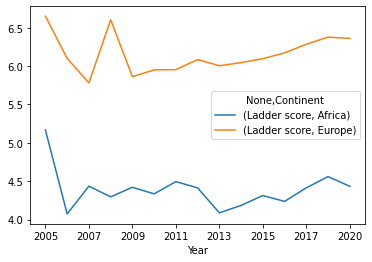

In [70]:
mergedf_dummy_AE.set_index(['Year','Continent']).unstack('Continent').plot()

In [71]:
dfAE = mergedf_dummy_AE.set_index(['Year','Continent']).unstack('Continent')
dfAE 

Ladder score          
Continent       Africa    Europe
Year                            
2005          5.167754  6.649996
2006          4.074250  6.099360
2007          4.435917  5.781829
2008          4.296343  6.604253
2009          4.421333  5.862517
2010          4.335638  5.951117
2011          4.495338  5.954311
2012          4.413454  6.085368
2013          4.088387  6.004509
2014          4.184657  6.046050
2015          4.314277  6.097782
2016          4.237311  6.172618
2017          4.414116  6.285215
2018          4.560497  6.377821
2020          4.433832  6.361440

## **Covid effect - Difference-in-difference - Table/value**

In [72]:
#create a variable that represent the reform (0 before the reform, 1 after)
dfAE['Covid'] = 0

In [73]:
dfAE

Ladder score           Covid
Continent       Africa    Europe      
Year                                  
2005          5.167754  6.649996     0
2006          4.074250  6.099360     0
2007          4.435917  5.781829     0
2008          4.296343  6.604253     0
2009          4.421333  5.862517     0
2010          4.335638  5.951117     0
2011          4.495338  5.954311     0
2012          4.413454  6.085368     0
2013          4.088387  6.004509     0
2014          4.184657  6.046050     0
2015          4.314277  6.097782     0
2016          4.237311  6.172618     0
2017          4.414116  6.285215     0
2018          4.560497  6.377821     0
2020          4.433832  6.361440     0

In [74]:
mergedf_dummy_AE.columns.tolist()

['Year', 'Continent', 'Ladder score']

In [75]:
dfAE.columns.tolist()

[('Ladder score', 'Africa'), ('Ladder score', 'Europe'), ('Covid', '')]

In [76]:
dfAE.index.tolist()

['2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2020']

In [77]:
dfAE[('Covid', '')] = dfAE.Covid.where(dfAE.index<'2020',1)


In [78]:
dfAE

Ladder score           Covid
Continent       Africa    Europe      
Year                                  
2005          5.167754  6.649996     0
2006          4.074250  6.099360     0
2007          4.435917  5.781829     0
2008          4.296343  6.604253     0
2009          4.421333  5.862517     0
2010          4.335638  5.951117     0
2011          4.495338  5.954311     0
2012          4.413454  6.085368     0
2013          4.088387  6.004509     0
2014          4.184657  6.046050     0
2015          4.314277  6.097782     0
2016          4.237311  6.172618     0
2017          4.414116  6.285215     0
2018          4.560497  6.377821     0
2020          4.433832  6.361440     1

In [79]:
#compare groups means

compare_AE_group_mean = dfAE.groupby('Covid').mean()
compare_AE_group_mean

Ladder score         
Continent       Africa   Europe
Covid                          
0             4.388519  6.14091
1             4.433832  6.36144

In [80]:
compare_AE_group_mean.columns = ['Africa','Europe']
compare_AE_group_mean

,Africa,Europe
Covid,,
0,4.388519,6.14091
1,4.433832,6.36144


In [81]:
#diff b/w the 2 groups (Europe and Africa) before and after Covid
compare_AE_group_mean['Europe']- compare_AE_group_mean['Africa']

Covid
0    1.752391
1    1.927608
dtype: float64

In [82]:
#diff-in-diff b/w the 2 groups (Europe and Africa) before and after Covid
(compare_AE_group_mean['Europe']- compare_AE_group_mean['Africa']).diff()

Covid
0         NaN
1    0.175217
dtype: float64

## **Covid effect - Difference-in-difference - Regression**

In [83]:
#diff-in-diff regression

In [84]:
mergedf_dummy_AE

,Year,Continent,Ladder score
0,2005,Europe,6.649996
1,2006,Europe,6.099360
2,2007,Europe,5.781829
3,2008,Europe,6.604253
4,2009,Europe,5.862517
5,2010,Europe,5.951117
6,2011,Europe,5.954311
7,2012,Europe,6.085368
8,2013,Europe,6.004509
9,2014,Europe,6.046050


In [85]:
mergedf_dummy_AE['Covid']=0
mergedf_dummy_AE['Covid']=mergedf_dummy_AE['Covid'].where(mergedf_dummy_AE.Year<'2020',1)
mergedf_dummy_AE

,Year,Continent,Ladder score,Covid
0,2005,Europe,6.649996,0
1,2006,Europe,6.099360,0
2,2007,Europe,5.781829,0
3,2008,Europe,6.604253,0
4,2009,Europe,5.862517,0
5,2010,Europe,5.951117,0
6,2011,Europe,5.954311,0
7,2012,Europe,6.085368,0
8,2013,Europe,6.004509,0
9,2014,Europe,6.046050,0


In [86]:
mergedf_dummy_AE['Africa'] = np.where(mergedf_dummy_AE.Continent=='Africa',1,0)
mergedf_dummy_AE

,Year,Continent,Ladder score,Covid,Africa
0,2005,Europe,6.649996,0,0
1,2006,Europe,6.099360,0,0
2,2007,Europe,5.781829,0,0
3,2008,Europe,6.604253,0,0
4,2009,Europe,5.862517,0,0
5,2010,Europe,5.951117,0,0
6,2011,Europe,5.954311,0,0
7,2012,Europe,6.085368,0,0
8,2013,Europe,6.004509,0,0
9,2014,Europe,6.046050,0,0


In [87]:
mergedf_dummy_AE.columns.tolist()

['Year', 'Continent', 'Ladder score', 'Covid', 'Africa']

In [88]:
mergedf_dummy_AE.rename(columns = {'Ladder score':'Lscore'}, inplace = True)

## **Covid effect - Difference-in-difference - Regression Model**

In [89]:
#outcome = treatment dummy + after intervention + affected by * after dummy (+other_vairables)

#Ladder score = Africa + after2020 + Africa * after2020

model = 'Lscore ~ Africa + Covid + Africa * Covid'

In [90]:
mergedf_dummy_AE.shape

(30, 5)

In [91]:
mod = smf.ols(formula=model,data=mergedf_dummy_AE)
diff_in_diff_reg = mod.fit()
print(diff_in_diff_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                 Lscore   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     113.5
Date:                Sat, 27 Feb 2021   Prob (F-statistic):           4.68e-15
Time:                        01:27:37   Log-Likelihood:               -0.25185
No. Observations:                  30   AIC:                             8.504
Df Residuals:                      26   BIC:                             14.11
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.1409      0.070     87.663   

## **What to do:**

data visualisation
*   Bar chart of 5 countries by life ladder (highest, lowest and 3 interesting)
*   Line chart for UK and NZ life ladder over time
*   scatter plot for all countries life ladder and GDP per capita. Can you change the colour for continent
*   Scatter plot for Europe, economic freedom and life ladder
*   Scatter plot with a line of best fit

Things to cover for each region:
*   How ladder score changes over time for each country and region (line chart)
*   	Happiest and unhappiest country in each region
*   Regression with all the variables
*   Relationship between GDP per capita and ladder score for 2020 (scatter plot)

## **Oceania Data Analysis**

In [92]:
#create a dataframe for Oceania data
Oceaniadf = mergedf[mergedf["Continent"] == "Oceania"]

#create a dataframe for Aus data
Ausdf = Oceaniadf[Oceaniadf["Country name"] == "Australia"]

#create a dataframe for Aus and Nz data
NZdf = Oceaniadf[Oceaniadf["Country name"] == "New Zealand"]

#create a dataframe which drops all NA values
Oceania_dropdf = Oceaniadf.dropna()

#create a new datadrame for Oceania exluding the one row which contains generosity=na
Oceania_newdf = Oceaniadf.drop(Oceaniadf.index[2])

#create statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [93]:
print(Oceania_dropdf)
len(Oceania_dropdf)

   Country name  Year  ... Generosity Perceptions of corruption
7   New Zealand  2020  ...   0.191598                  0.221139
11    Australia  2020  ...   0.190460                  0.415169

[2 rows x 11 columns]


2

In [94]:
print(Oceaniadf)
len(Oceaniadf)

     Country name  Year  ... Generosity Perceptions of corruption
7     New Zealand  2020  ...   0.191598                  0.221139
11      Australia  2020  ...   0.190460                  0.415169
59      Australia  2005  ...        NaN                  0.390416
60      Australia  2007  ...   0.338664                  0.512578
61      Australia  2008  ...   0.296854                  0.430811
62      Australia  2010  ...   0.308317                  0.366127
63      Australia  2011  ...   0.360890                  0.381772
64      Australia  2012  ...   0.265169                  0.368252
65      Australia  2013  ...   0.260280                  0.431539
66      Australia  2014  ...   0.310035                  0.442021
67      Australia  2015  ...   0.323258                  0.356554
68      Australia  2016  ...   0.229793                  0.398545
69      Australia  2017  ...   0.308773                  0.411347
70      Australia  2018  ...   0.137795                  0.404647
1077  New 

26

In [95]:
print(Ausdf)
print(NZdf)

   Country name  Year  ... Generosity Perceptions of corruption
11    Australia  2020  ...   0.190460                  0.415169
59    Australia  2005  ...        NaN                  0.390416
60    Australia  2007  ...   0.338664                  0.512578
61    Australia  2008  ...   0.296854                  0.430811
62    Australia  2010  ...   0.308317                  0.366127
63    Australia  2011  ...   0.360890                  0.381772
64    Australia  2012  ...   0.265169                  0.368252
65    Australia  2013  ...   0.260280                  0.431539
66    Australia  2014  ...   0.310035                  0.442021
67    Australia  2015  ...   0.323258                  0.356554
68    Australia  2016  ...   0.229793                  0.398545
69    Australia  2017  ...   0.308773                  0.411347
70    Australia  2018  ...   0.137795                  0.404647

[13 rows x 11 columns]
     Country name  Year  ... Generosity Perceptions of corruption
7     New Zeal

In [96]:
#create a new datadrame for Oceania exluding the one row which contains generosity=na
Oceania_newdf = Oceaniadf.drop(Oceaniadf.index[2])
print(Oceania_newdf)

     Country name  Year  ... Generosity Perceptions of corruption
7     New Zealand  2020  ...   0.191598                  0.221139
11      Australia  2020  ...   0.190460                  0.415169
60      Australia  2007  ...   0.338664                  0.512578
61      Australia  2008  ...   0.296854                  0.430811
62      Australia  2010  ...   0.308317                  0.366127
63      Australia  2011  ...   0.360890                  0.381772
64      Australia  2012  ...   0.265169                  0.368252
65      Australia  2013  ...   0.260280                  0.431539
66      Australia  2014  ...   0.310035                  0.442021
67      Australia  2015  ...   0.323258                  0.356554
68      Australia  2016  ...   0.229793                  0.398545
69      Australia  2017  ...   0.308773                  0.411347
70      Australia  2018  ...   0.137795                  0.404647
1077  New Zealand  2006  ...   0.308866                  0.224220
1078  New 

# **Oceania Regression**

In [97]:
#bivariate regression (based on 2 countries only)

X = Oceaniadf['Logged GDP per capita']
Y = Oceaniadf['Ladder score']

X = sm.add_constant(X)

#simple OLS model
Oceania_bivar_reg_model = sm.OLS(Y, X).fit()

print_Oceania_bivar_reg_model = Oceania_bivar_reg_model.summary()
print(print_Oceania_bivar_reg_model)

                            OLS Regression Results                            
Dep. Variable:           Ladder score   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     1.313
Date:                Sat, 27 Feb 2021   Prob (F-statistic):              0.263
Time:                        01:27:47   Log-Likelihood:                 25.715
No. Observations:                  26   AIC:                            -47.43
Df Residuals:                      24   BIC:                            -44.91
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     9.09

In [98]:
#multivariate regression

X = Oceania_newdf[['Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
Y = Oceania_newdf['Ladder score']

X = sm.add_constant(X)

#Multivariate OLS model
Oceania_multi_reg_model = sm.OLS(Y, X).fit()

print_Oceania_multi_reg_model = Oceania_multi_reg_model.summary()
print(print_Oceania_multi_reg_model)

                            OLS Regression Results                            
Dep. Variable:           Ladder score   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     2.017
Date:                Sat, 27 Feb 2021   Prob (F-statistic):              0.116
Time:                        01:27:47   Log-Likelihood:                 30.065
No. Observations:                  25   AIC:                            -46.13
Df Residuals:                      18   BIC:                            -37.60
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

# **Oceania Scatter plot**

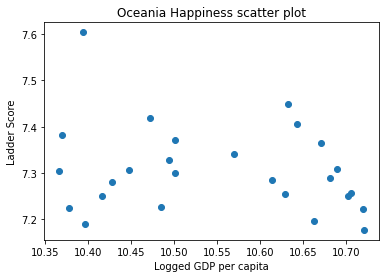

In [99]:
#Scatter plot of Aus and NZ's Logged GDP per capita x Ladder score over time
#Not much meaning
plt.scatter(Oceaniadf['Logged GDP per capita'], Oceaniadf['Ladder score'])
plt.title('Oceania Happiness scatter plot')
plt.xlabel("Logged GDP per capita")
plt.ylabel("Ladder Score")
plt.show()

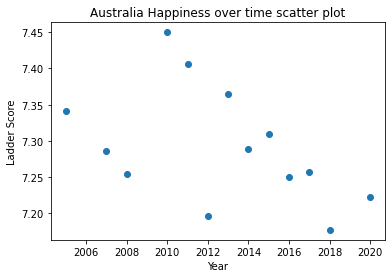

In [100]:
#Scatter plot of Aus's Ladder score over time
#Strong negative relationship
plt.scatter(Ausdf['Year'], Ausdf['Ladder score'])
plt.title('Australia Happiness over time scatter plot')
plt.xlabel("Year")
plt.ylabel("Ladder Score")
plt.show()

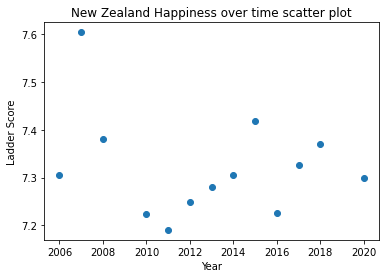

In [101]:
#Scatter plot of New Zealand's Ladder score over time
#Some negative relationship
plt.scatter(NZdf['Year'], NZdf['Ladder score'])
plt.title('New Zealand Happiness over time scatter plot')
plt.xlabel("Year")
plt.ylabel("Ladder Score")
plt.show()

In [102]:
Oceaniadf

,Country name,Year,Continent,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
7,New Zealand,2020,Oceania,North America and ANZ,7.299600,10.500943,0.949119,73.202629,0.936217,0.191598,0.221139
11,Australia,2020,Oceania,North America and ANZ,7.222800,10.720596,0.944855,73.604538,0.915432,0.190460,0.415169
59,Australia,2005,Oceania,NaN,7.340688,10.569470,0.967892,71.400002,0.934973,NaN,0.390416
60,Australia,2007,Oceania,NaN,7.285391,10.613497,0.965276,71.720001,0.890682,0.338664,0.512578
61,Australia,2008,Oceania,NaN,7.253757,10.629381,0.946635,71.879997,0.915733,0.296854,0.430811
62,Australia,2010,Oceania,NaN,7.450047,10.632582,0.954520,72.199997,0.932059,0.308317,0.366127
63,Australia,2011,Oceania,NaN,7.405616,10.642902,0.967029,72.300003,0.944586,0.360890,0.381772
64,Australia,2012,Oceania,NaN,7.195586,10.663229,0.944599,72.400002,0.935146,0.265169,0.368252
65,Australia,2013,Oceania,NaN,7.364169,10.671698,0.928205,72.500000,0.933379,0.260280,0.431539
66,Australia,2014,Oceania,NaN,7.288550,10.681601,0.923799,72.599998,0.922932,0.310035,0.442021


## **Oceania Data visualisation**

<Figure size 360x360 with 0 Axes>

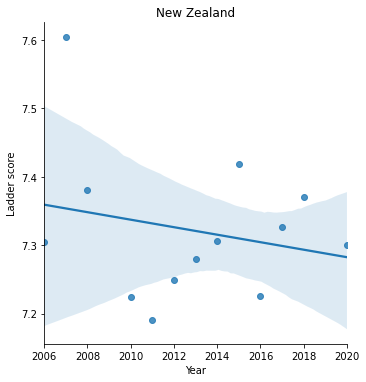

<Figure size 360x360 with 0 Axes>

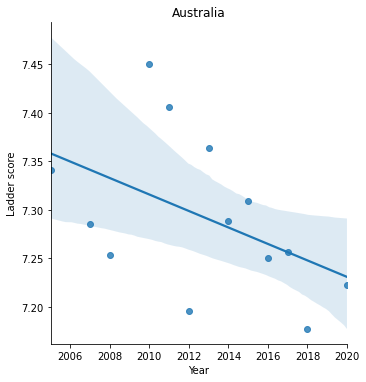

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


countries = ['Australia', 'New Zealand']
df_oceania_data = Oceaniadf[Oceaniadf["Country name"].isin(countries)]

for country in Oceaniadf['Country name'].unique():
    plt.figure(figsize = (5,5))
    data = Oceaniadf[Oceaniadf['Country name'] == country]
    sns.lmplot(x='Year', y = 'Ladder score', data = data)
    plt.title(country)


Text(0.5, 1.0, 'Oceania, Ladder score x Logged GDP per capita')

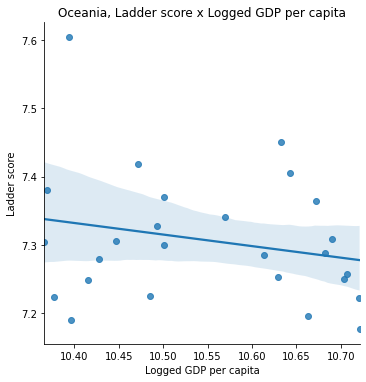

In [104]:
sns.lmplot(x='Logged GDP per capita', y ='Ladder score', data = Oceaniadf)
plt.title('Oceania, Ladder score x Logged GDP per capita')

Text(0.5, 1.0, 'Oceania, Ladder score x Social support')

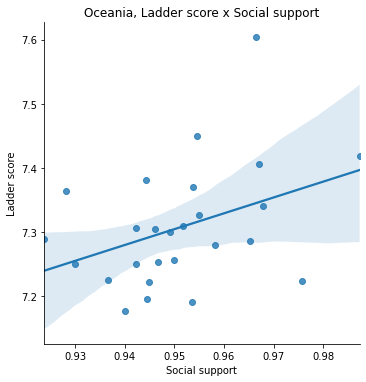

In [105]:
sns.lmplot(x='Social support', y = 'Ladder score', data = Oceaniadf)
plt.title('Oceania, Ladder score x Social support')

Text(0.5, 1.0, 'Oceania, Ladder score x Healthy life expectancy')

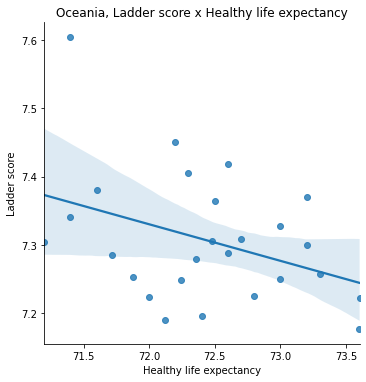

In [106]:
sns.lmplot(x='Healthy life expectancy', y = 'Ladder score', data = Oceaniadf)
plt.title('Oceania, Ladder score x Healthy life expectancy')

Text(0.5, 1.0, 'Oceania, Ladder score x Freedom to make life choices')

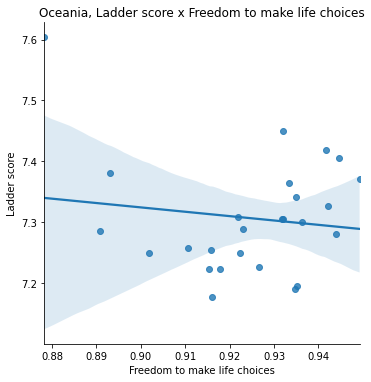

In [107]:
sns.lmplot(x='Freedom to make life choices', y = 'Ladder score', data = Oceaniadf)
plt.title('Oceania, Ladder score x Freedom to make life choices')

Text(0.5, 1.0, 'Oceania, Ladder score x Generosity')

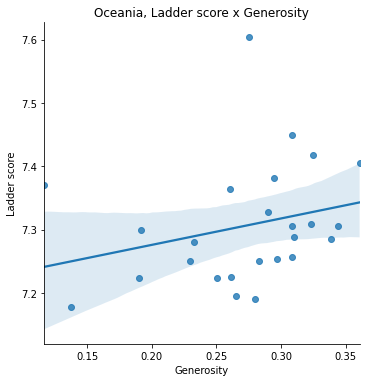

In [108]:
sns.lmplot(x='Generosity', y = 'Ladder score', data = Oceaniadf)
plt.title('Oceania, Ladder score x Generosity')

Text(0.5, 1.0, 'Oceania, Ladder score x Perceptions of corruption')

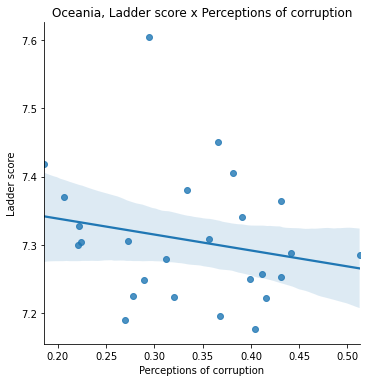

In [109]:
sns.lmplot(x='Perceptions of corruption', y = 'Ladder score', data = Oceaniadf)
plt.title('Oceania, Ladder score x Perceptions of corruption')

# **Oceania Line graph**

In [110]:
mergedf_dummy = mergedf_dummy.dropna()
mergedf_dummy 

,Country name,Year,Continent,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Africa,Asia,Europe,North America,Oceania,South America
0,Finland,2020,Europe,Western Europe,7.8087,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,0,0,1,0,0,0
1,Denmark,2020,Europe,Western Europe,7.6456,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,0,0,1,0,0,0
2,Switzerland,2020,Europe,Western Europe,7.5599,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,0,0,1,0,0,0
3,Iceland,2020,Europe,Western Europe,7.5045,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,0,0,1,0,0,0
4,Norway,2020,Europe,Western Europe,7.4880,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,Central African Republic,2020,Africa,Sub-Saharan Africa,3.4759,6.625160,0.319460,45.200001,0.640881,0.082410,0.891807,1,0,0,0,0,0
149,Rwanda,2020,Africa,Sub-Saharan Africa,3.3123,7.600104,0.540835,61.098846,0.900589,0.055484,0.183541,1,0,0,0,0,0
150,Zimbabwe,2020,Africa,Sub-Saharan Africa,3.2992,7.865712,0.763093,55.617260,0.711458,-0.072064,0.810237,1,0,0,0,0,0
151,South Sudan,2020,Africa,Sub-Saharan Africa,2.8166,7.425360,0.553707,51.000000,0.451314,0.016519,0.763417,1,0,0,0,0,0


In [111]:
unique_continent = mergedf_dummy["Continent"].unique()
unique_country = mergedf_dummy["Country name"].unique()

continents_colours = {"Asia": "red", "Europe": "blue", "Oceania": "green", "North America": "purple", "South America": "brown", "Africa": "orange"}


for i in unique_continent:
  y = mergedf_dummy[mergedf_dummy["Continent"] == i]["Ladder score"]
  x = mergedf_dummy[mergedf_dummy["Continent"] == i]["Year"]
  colour = {"Asia": "red", "Europe": "blue", "Oceania": "green", "North America": "purple", "South America": "brown", "Africa": "orange"}
  plt.plot(x, y, c = color)

plt.xlabel("Year")
plt.ylabel("Ladder Score")
plt.show()


NameError: ignored

In [ ]:
unique_continent = mergedf_dummy["Continent"].unique()
Continents_colours = {"Asia": "red", "Europe": "blue", "Oceania": "green", "North America": "purple", "South America": "brown", "Africa": "orange"}

for i in unique_continent:
  y = mergedf_dummy[mergedf_dummy["Continent"] == i]["Ladder score"]
  x = mergedf_dummy[mergedf_dummy["Continent"] == i]["Year"]
  color = region_colours[mergedf_dummy[mergedf_dummy["Continent"] == i][''].iat[0]]
  plt.plot(x, y, c = color)

plt.xlabel("Year")
plt.ylabel("Ladder Score")
plt.show()

In [ ]:
#Line graph of Aus's Ladder score over time
#fluctuates, but small decrease over all, from 2005-2020
#max:2010=7.45, min:2018=7.18

from matplotlib import pyplot as plt

plt.plot(Ausdf['Year'], Ausdf['Ladder score'], color='green', marker='o', linestyle='solid')
plt.xlabel("Year")
plt.ylabel("Ladder Score")
plt.title("Australia Ladder score") 
plt.grid(True)

plt.show()


In [ ]:
#Line graph of Nz's Ladder score over time
#fluctuates as well, but the figure in 2020 remains the same as 2005's
#max:2007 =7.60, min:2011=7.19

from matplotlib import pyplot as plt

plt.plot(NZdf['Year'], NZdf['Ladder score'], color='green', marker='o', linestyle='solid')
plt.xlabel("Year")
plt.ylabel("Ladder Score")
plt.title("New Zealand Happiness over time line graph") 

plt.show()

# **Oceania Comparing difference Bar chart (averages, max, min)**

In [ ]:
#Create a new Oceania average dataframe to find average indexes for each country

Oceania_avdf= Oceania_newdf.groupby(['Country name']).agg([np.average])
print(Oceania_avdf)

                     Year Ladder score  ... Generosity Perceptions of corruption
                  average      average  ...    average                   average
Country name                            ...                                     
Australia     2013.416667     7.288257  ...   0.277524                  0.409947
New Zealand   2012.846154     7.321639  ...   0.265702                  0.263890

[2 rows x 8 columns]


In [ ]:
#happiest/happier country = Nz
Oceania_avdf.loc[Oceania_avdf['Ladder score'].idxmax()]


,Year,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
,average,average,average,average,average,average,average,average
Country name,,,,,,,,
New Zealand,2012.846154,7.321639,10.434367,0.953735,72.323279,0.925368,0.265702,0.26389


In [ ]:
#unhappiest/unhappier country = Aus
Oceania_avdf.loc[Oceania_avdf['Ladder score'].idxmin()]

,Year,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
,average,average,average,average,average,average,average,average
Country name,,,,,,,,
Australia,2013.416667,7.288257,10.673032,0.946601,72.650378,0.921726,0.277524,0.409947


In [ ]:
#Compare Aus vs NZ average difference

NZ_Aus_diff = round((7.321639 - 7.288257),3)

print('New'+' '+'Zealand'+' '+'is'+ ' ' + str(NZ_Aus_diff) + ' ' +'happier' +' '+'than'+' '+'Austrialia'+' '+'on'+' '+'average'+ '.')



New Zealand is 0.033 happier than Austrialia on average.


In [ ]:
#Aus happinst time: 2010 = 7.45
Ausdf.loc[Ausdf['Ladder score'].idxmax()]

Country name                    Australia
Year                                 2010
Continent                         Oceania
Regional indicator                    NaN
Ladder score                      7.45005
Logged GDP per capita             10.6326
Social support                    0.95452
Healthy life expectancy              72.2
Freedom to make life choices     0.932059
Generosity                       0.308317
Perceptions of corruption        0.366127
Name: 62, dtype: object

In [ ]:
#Aus unhappinst time: 2018 = 7.18
Ausdf.loc[Ausdf['Ladder score'].idxmin()]

Country name                    Australia
Year                                 2018
Continent                         Oceania
Regional indicator                    NaN
Ladder score                      7.17699
Logged GDP per capita              10.721
Social support                   0.940137
Healthy life expectancy              73.6
Freedom to make life choices     0.916028
Generosity                       0.137795
Perceptions of corruption        0.404647
Name: 70, dtype: object

In [ ]:
#NZ happinst time: 2007 = 7.60
NZdf.loc[NZdf['Ladder score'].idxmax()]

Country name                    New Zealand
Year                                   2007
Continent                           Oceania
Regional indicator                      NaN
Ladder score                        7.60417
Logged GDP per capita               10.3938
Social support                     0.966533
Healthy life expectancy                71.4
Freedom to make life choices       0.878219
Generosity                         0.275482
Perceptions of corruption          0.294616
Name: 1078, dtype: object

In [ ]:
#NZ unhappinst time: 2011 = 7.19
NZdf.loc[NZdf['Ladder score'].idxmin()]

Country name                    New Zealand
Year                                   2011
Continent                           Oceania
Regional indicator                      NaN
Ladder score                        7.19064
Logged GDP per capita               10.3962
Social support                      0.95365
Healthy life expectancy               72.12
Freedom to make life choices       0.934769
Generosity                         0.280215
Perceptions of corruption           0.26933
Name: 1081, dtype: object

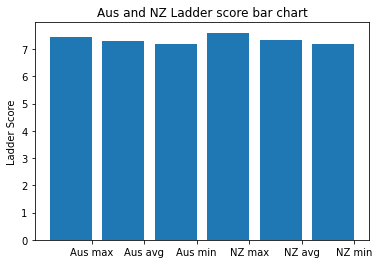

In [ ]:
Aus_NZ = ["Aus max", "Aus avg", "Aus min", "NZ max", "NZ avg", "NZ min"]
Ladder_score = [7.45, 7.29, 7.18, 7.60, 7.32, 7.19]

xs = [i + 0.1 for i, _ in enumerate(Aus_NZ)] # bars are by default width 0.8, so we'll add 0.1 to the left coordinates # so that each bar is centered
    
plt.bar(xs, Ladder_score) # plot bars with left x-coordinates [xs], heights [num_oscars]
plt.ylabel("Ladder Score")
plt.title("Aus and NZ Ladder score bar chart")

plt.xticks([i + 0.5 for i, _ in enumerate(Aus_NZ)], Aus_NZ) # label x-axis with movie names at bar centers
plt.show()

In [126]:
Ans_NZ_table = [['Aus', 'max', 7.45], ['Aus', 'avg', 	7.29], ['Aus', 'min', 7.18], 
['NZ', 'max', 7.60], ['NZ', 'avg', 7.32], ['NZ', 'min', 7.19]]
  
# Create the pandas DataFrame 
import pandas as pd 
df_Ans_NZ_table = pd.DataFrame(Ans_NZ_table, columns = ['Country',' ', 'Ladder score'])
df_Ans_NZ_table

,Country,,Ladder score
0,Aus,max,7.45
1,Aus,avg,7.29
2,Aus,min,7.18
3,NZ,max,7.60
4,NZ,avg,7.32
5,NZ,min,7.19


In [121]:
Aus_NZ = ["Aus max", "Aus avg", "Aus min", "NZ max", "NZ avg", "NZ min"]
Ladder_score = [7.45, 7.29, 7.18, 7.60, 7.32, 7.19]

Ans_NZ_table = [Aus_NZ:Ladder_score]
Ans_NZ_table

SyntaxError: ignored

## **World line graph comparison**

In [ ]:
mergedf_dummy_for_graph = pd.concat([mergedf, pd.get_dummies(mergedf['Continent'])], axis=1)
mergedf_dummy_for_graph

,Country name,Year,Continent,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Africa,Asia,Europe,North America,Oceania,South America
0,Finland,2020,Europe,Western Europe,7.808700,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,0,0,1,0,0,0
1,Denmark,2020,Europe,Western Europe,7.645600,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,0,0,1,0,0,0
2,Switzerland,2020,Europe,Western Europe,7.559900,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,0,0,1,0,0,0
3,Iceland,2020,Europe,Western Europe,7.504500,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,0,0,1,0,0,0
4,Norway,2020,Europe,Western Europe,7.488000,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,Zimbabwe,2014,Africa,NaN,4.184451,7.562753,0.765839,52.380001,0.642034,-0.048634,0.820217,1,0,0,0,0,0
1700,Zimbabwe,2015,Africa,NaN,3.703191,7.556052,0.735800,53.799999,0.667193,-0.097354,0.810457,1,0,0,0,0,0
1701,Zimbabwe,2016,Africa,NaN,3.735400,7.538829,0.768425,54.400002,0.732971,-0.068105,0.723612,1,0,0,0,0,0
1702,Zimbabwe,2017,Africa,NaN,3.638300,7.549491,0.754147,55.000000,0.752826,-0.069670,0.751208,1,0,0,0,0,0


In [ ]:
mergedf_dummy_for_graph.columns.tolist()

['Country name',
 'Year',
 'Continent',
 'Regional indicator',
 'Ladder score',
 'Logged GDP per capita',
 'Social support',
 'Healthy life expectancy',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption',
 'Africa',
 'Asia',
 'Europe',
 'North America',
 'Oceania',
 'South America']

In [ ]:
mergedf_dummy_graph = mergedf_dummy_for_graph.drop(columns=['Country name',
 'Regional indicator',
 'Logged GDP per capita',
 'Social support',
 'Healthy life expectancy',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption',
 'Africa',
 'Asia',
 'Europe',
 'North America',
 'Oceania',
 'South America'])

In [ ]:
mergedf_dummy_graph

,Year,Continent,Ladder score
0,2020,Europe,7.808700
1,2020,Europe,7.645600
2,2020,Europe,7.559900
3,2020,Europe,7.504500
4,2020,Europe,7.488000
...,...,...,...
1699,2014,Africa,4.184451
1700,2015,Africa,3.703191
1701,2016,Africa,3.735400
1702,2017,Africa,3.638300


In [ ]:
mergedf

,Country name,Year,Continent,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,2020,Europe,Western Europe,7.808700,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445
1,Denmark,2020,Europe,Western Europe,7.645600,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489
2,Switzerland,2020,Europe,Western Europe,7.559900,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728
3,Iceland,2020,Europe,Western Europe,7.504500,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710
4,Norway,2020,Europe,Western Europe,7.488000,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218
...,...,...,...,...,...,...,...,...,...,...,...
1699,Zimbabwe,2014,Africa,NaN,4.184451,7.562753,0.765839,52.380001,0.642034,-0.048634,0.820217
1700,Zimbabwe,2015,Africa,NaN,3.703191,7.556052,0.735800,53.799999,0.667193,-0.097354,0.810457
1701,Zimbabwe,2016,Africa,NaN,3.735400,7.538829,0.768425,54.400002,0.732971,-0.068105,0.723612
1702,Zimbabwe,2017,Africa,NaN,3.638300,7.549491,0.754147,55.000000,0.752826,-0.069670,0.751208


In [ ]:
mergedf_E = mergedf.loc[mergedf['Continent'] == 'Europe']

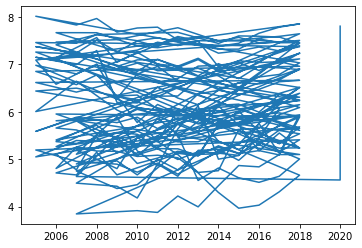

In [ ]:
plt.plot(mergedf_E["Year"], mergedf_E["Ladder score"])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(mergedf[mergedf["Continent"=='Asia']["Year"], mergedf[mergedf["Continent"=='Asia']["Ladder score"], label = Asia)
plt.plot(mergedf[mergedf["Continent"=='Africa']["Year"], mergedf[mergedf["Continent"=='Africa']["Ladder score"], label = Africa)
plt.legend()
plt.show()

SyntaxError: ignored

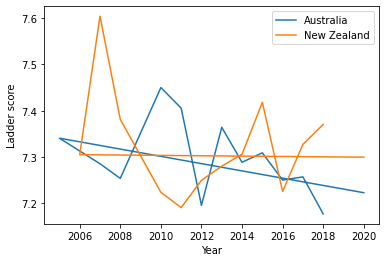

In [133]:

plt.plot(Oceaniadf[Oceaniadf["Country name"] == 'Australia']["Year"], Oceaniadf[Oceaniadf["Country name"] == 'Australia']["Ladder score"],label = 'Australia')
plt.plot(Oceaniadf[Oceaniadf["Country name"] == 'New Zealand']["Year"], Oceaniadf[Oceaniadf["Country name"] == 'New Zealand']["Ladder score"], label = 'New Zealand')
plt.ylabel('Ladder score')
plt.xlabel('Year')
plt.legend()
plt.show()